## Public Experience and Perception towards AI as Medical Device in Developing Perception AI Perpetuating Health Inequality

### Introduction

The advancements in AI in Healthcare has been improving the sector and helping medical professionals. Studies have extensively researched attitudes of service users towards AI in healthcare. Moreso, more investments are being challed to the space. The Canadian Government recently announced USD200 million investment in medical AI research. A recent report showed that market size for AI in healthcare in 2024 is valued at USD20.9 billion and is expecteded to reach USD148.9 billion in 2029 (Markets and Markets, 2024). This means that in the near future, more innovations and increasing adoption of the technologies will ensue. While this is very important for global economy, not enough is said about the end-user perception of the tools and the general impact on health outcomes. Although most studies have looked at the attitudes and perceptions of public towards AI in health, how these as well as the experiences will likely influence other perceptions have been underexplored. While the world still grapple with the apparent effect of inequality exacebated by the COVID pandemic, and exploring AI in bridging the gap, it is important to look at how AI in healthcare is impacting inequality.

In other to understand this, this analysis aims to identify influencing factors for such concerns by answering the following questions:
1. Would knowledge of AI, past experiences and perceptions of comfort and concerns influence perceptions of AI perpetuating inequality?
2.  How would the social factors moderate these perceptions?

The importance of this is to identify what are the likely factors that could influence and/or limit people from not leveraging AI in their care management.

### Load Libraries

In [5]:
#Loading and inspecting the dataset.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import math
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from statsmodels.tools import add_constant

### Data Preparation
The first step in our analysis involves loading and preparing the Infoway dataset for exploration and analysis. This includes loading the dataset, examining the first few rows for an initial understanding, identifying the data types of various columns, and summarising the dataset to gain a basic overview.

In [7]:
data = pd.read_csv('2023CanadaHealthSurvey.csv')
data.head()

,record,QLANG,Q1_AGE_CAT,Q2_recoded,Q3,Q4_recoded,Q5_recoded,Q6r1,Q6r2,Q6r3,...,Q45r10,Q45r96,Q45r98,Q45r99,Q46,Q47r1,Q47r2,Q48,Q49,Weight
0,3.0,1.0,5.0,6.0,4.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,1.055538
1,4.0,1.0,5.0,9.0,5.0,2.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,3.0,1.0,1.0,6.0,6.0,0.751010
2,5.0,1.0,5.0,6.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,6.0,1.055538
3,6.0,1.0,5.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,6.0,0.785421
4,7.0,1.0,5.0,6.0,4.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,6.0,0.728936


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10130 entries, 0 to 10129
Columns: 242 entries, record to Weight
dtypes: float64(242)
memory usage: 18.7 MB


### Select columns relevant for the analysis

According to the study by Antes et al. (2021), concerns about AI in healthcare may be partly due to familiarity with the use of digital tools and socioeconomic factors. Ho et al. (2023) also explored concerns of privacy, losing control to AI on how they predict attitude towards medical AI. In line with my research questions, I selected the variables that fit into these categories to understand how these influence the perception of AI perpetuating inequality.

In [11]:
#Selection of the important columns for the study mental health patients and perception

selected_columns = [
    'Q1_AGE_CAT','Q5_recoded', # demography  

    'Q11d', 'Q11e','Q11f','Q11g','Q11h','Q11i','Q11j','Q11k','Q11l',
    'Q11m','Q11n','Q11o','Q11p','Q13', # Past experience accessing virtual services
    
    'Q31',  # knowledge 
    'Q32', 'Q33', 'Q34', 'Q35r1', 'Q35r2', 'Q35r3','Q35r4','Q35r5','Q35r6','Q35r7', # comfort
    'Q36r1', 'Q36r2', 'Q36r3', 'Q36r4', 'Q36r5', 'Q36r6', 'Q36r7', # concerns
    
    'Q40', 'Q48', 'Q49', # socioeconomic factors

]

# Select the appropriate columns
selected = data[selected_columns]
selected.head()

,Q1_AGE_CAT,Q5_recoded,Q11d,Q11e,Q11f,Q11g,Q11h,Q11i,Q11j,Q11k,...,Q36r1,Q36r2,Q36r3,Q36r4,Q36r5,Q36r6,Q36r7,Q40,Q48,Q49
0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,NaN,NaN,1.0,3.0,NaN,NaN,2.0,2.0,1.0
1,5.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,...,NaN,NaN,2.0,NaN,1.0,3.0,NaN,1.0,6.0,6.0
2,5.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1.0,NaN,3.0,2.0,NaN,NaN,NaN,2.0,3.0,6.0
3,5.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,NaN,NaN,1.0,NaN,3.0,NaN,1.0,4.0,6.0
4,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,2.0,3.0,1.0,1.0,2.0,6.0


### Renaming Columns

I renamed the columns to enable ease of readability.

In [13]:

# Create a dictionary
import pandas as pd

# Create a dictionary for renaming the columns
rename_columns = {
    "Q1_AGE_CAT": "age",
    "Q5_recoded": "gender",
    "Q11d": "past_virtual_visit_with_healthcare_provider",
    "Q11e": "past_virtual_consultation",
    "Q11f": "past_telephone_consultation",
    "Q11g": "past_remote_monitoring",
    "Q11h": "past_digital_prescription",
    "Q11i": "past_digital_prescription_renewal",
    "Q11j": "past_digital_mental_health_support",
    "Q11k": "past_digital_health",
    "Q11l": "past_digital_health_reminders",
    "Q11m": "past_access_to_clinical_notes",
    "Q11n": "past_access_to_telehealth",
    "Q11o": "past_access_to_symptomchecker",
    "Q11p": "past_chatbot_consultation",
    "Q13": "offered_acces_to_electronic_info",
    "Q31": "AI_knowledge",
    "Q32": "speed",
    "Q33": "informedconsent_personal_healthdata_for_AIresearch",
    "Q34": "uninformedconsent_deidentified_personal_healthdata_for_AIresearch",
    "Q35r1": "comfort_withAI_disease_prediction",
    "Q35r2": "comfort_withAI_decision_support",
    "Q35r3": "comfort_withAI_presicion_medicine",
    "Q35r4": "comfort_withAI_drug_development",
    "Q35r5": "comfort_withAI_disease_monitoring",
    "Q35r6": "comfort_withAI_tracking_epidemics",
    "Q35r7": "comfort_withAI_healthcare_efficiency",
    "Q36r1": "concerns_withAI_privacy",
    "Q36r2": "concerns_withAI_perpetuateinequalities",
    "Q36r3": "concerns_withAI_consent",
    "Q36r4": "concerns_withAI_data_ownership",
    "Q36r5": "concerns_withAI_human_interaction",
    "Q36r6": "concerns_withAI_digital_literacy",
    "Q36r7": "concerns_withAI_liability_and_decisions",
    "Q40": "annual_household_income",
    "Q48": "education_level",
    "Q49": "employment_status"
}

# Select and rename the columns
df_selected = selected[list(rename_columns.keys())].rename(columns=rename_columns)
df_selected

,age,gender,past_virtual_visit_with_healthcare_provider,past_virtual_consultation,past_telephone_consultation,past_remote_monitoring,past_digital_prescription,past_digital_prescription_renewal,past_digital_mental_health_support,past_digital_health,...,concerns_withAI_privacy,concerns_withAI_perpetuateinequalities,concerns_withAI_consent,concerns_withAI_data_ownership,concerns_withAI_human_interaction,concerns_withAI_digital_literacy,concerns_withAI_liability_and_decisions,annual_household_income,education_level,employment_status
0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,NaN,NaN,1.0,3.0,NaN,NaN,2.0,2.0,1.0
1,5.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,...,NaN,NaN,2.0,NaN,1.0,3.0,NaN,1.0,6.0,6.0
2,5.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1.0,NaN,3.0,2.0,NaN,NaN,NaN,2.0,3.0,6.0
3,5.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,NaN,NaN,1.0,NaN,3.0,NaN,1.0,4.0,6.0
4,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,2.0,3.0,1.0,1.0,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10125,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,NaN,NaN,2.0,3.0,NaN,NaN,1.0,1.0,1.0
10126,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0
10127,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,...,NaN,NaN,NaN,3.0,NaN,2.0,1.0,8.0,6.0,1.0
10128,1.0,1.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,3.0,...,3.0,NaN,NaN,2.0,1.0,NaN,NaN,1.0,1.0,3.0


In [14]:
# Verify the renamed columns
renamed_columns = df_selected.columns
print("Renamed Columns:")
print(renamed_columns)

Renamed Columns:
Index(['age', 'gender', 'past_virtual_visit_with_healthcare_provider',
       'past_virtual_consultation', 'past_telephone_consultation',
       'past_remote_monitoring', 'past_digital_prescription',
       'past_digital_prescription_renewal',
       'past_digital_mental_health_support', 'past_digital_health',
       'past_digital_health_reminders', 'past_access_to_clinical_notes',
       'past_access_to_telehealth', 'past_access_to_symptomchecker',
       'past_chatbot_consultation', 'offered_acces_to_electronic_info',
       'AI_knowledge', 'speed',
       'informedconsent_personal_healthdata_for_AIresearch',
       'uninformedconsent_deidentified_personal_healthdata_for_AIresearch',
       'comfort_withAI_disease_prediction', 'comfort_withAI_decision_support',
       'comfort_withAI_presicion_medicine', 'comfort_withAI_drug_development',
       'comfort_withAI_disease_monitoring',
       'comfort_withAI_tracking_epidemics',
       'comfort_withAI_healthcare_efficien

### Identifying and handling null or missing values in the dataset

This is a crucial step in my data preparation. Null values significantly affect the integrity and validity of analysis. Identifying and handling them appropriately will to a great length reduce bias. My approach to handling these null values is tailored to maintain the dataset's robustness and within the research question. I will first identify them.

In [16]:
# Check for missing values in the dataset
missing_values = df_selected.isnull().sum()
missing_values
# Display columns with missing values and the count of missing data
missing_values[missing_values > 0]

concerns_withAI_privacy                    5506
concerns_withAI_perpetuateinequalities     7866
concerns_withAI_consent                    7025
concerns_withAI_data_ownership             7147
concerns_withAI_human_interaction          3889
concerns_withAI_digital_literacy           7344
concerns_withAI_liability_and_decisions    5322
dtype: int64

All null values were columns of concerns. A look at the column responses can provide information on the possible way to handle the missing values. 

An exploration of the response and questionnaire shows that these were indices. Partiicipants were asked to choose 3 top concerns from list. This follows that a participant can only choose 3 concerns in the index, consequently leading to some options not chosen. Hence, removing these observation will not be ideal.

### Handling missing values

The null values for the columns (concern variables) are options that participants did not choose. In other words, the null values are not as a result of a limitation of the choices available for participants.

#### Data Transformation

To handle these columns, neither imputation nor central tendency is useful. Rather, the columns will be transformed to "0" (not chosen/null) and "1" (chosen) to allow for better analysis.

In [22]:
columns_to_transform = [
    'concerns_withAI_privacy','concerns_withAI_perpetuateinequalities','concerns_withAI_consent',
    'concerns_withAI_data_ownership','concerns_withAI_human_interaction',
    'concerns_withAI_digital_literacy','concerns_withAI_liability_and_decisions'
]

# Function to replace values
def transform_values(x):
    if pd.isna(x):
        return 0
    elif x in [1, 2, 3]:
        return 1
    else:
        return x

# Apply the transformation to the specified columns
df_selected[columns_to_transform] = df_selected[columns_to_transform].applymap(transform_values)

# Display the transformed DataFrame
df_selected.head()
 

,age,gender,past_virtual_visit_with_healthcare_provider,past_virtual_consultation,past_telephone_consultation,past_remote_monitoring,past_digital_prescription,past_digital_prescription_renewal,past_digital_mental_health_support,past_digital_health,...,concerns_withAI_privacy,concerns_withAI_perpetuateinequalities,concerns_withAI_consent,concerns_withAI_data_ownership,concerns_withAI_human_interaction,concerns_withAI_digital_literacy,concerns_withAI_liability_and_decisions,annual_household_income,education_level,employment_status
0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1,0,0,1,1,0,0,2.0,2.0,1.0
1,5.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,...,0,0,1,0,1,1,0,1.0,6.0,6.0
2,5.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1,0,1,1,0,0,0,2.0,3.0,6.0
3,5.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,...,1,0,0,1,0,1,0,1.0,4.0,6.0
4,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0,0,0,0,1,1,1,1.0,2.0,6.0


In [23]:
#Confirm null values have been transformed

# Check for missing values in the dataset
missing_values = df_selected.isnull().sum()
missing_values
# Display columns with missing values and the count of missing data
missing_values[missing_values > 0]

Series([], dtype: int64)

There are no missing values.

#### Confirm the entries in the dataset

In [26]:
#Confirming the transformation of the variables
for col in df_selected.columns:
    print('--------------------------------------------')
    unique_vals = df_selected[col].unique()
    print(f'{col}:')
    print(f'{unique_vals}')
    print(f'Total Values: {len(unique_vals)}')

--------------------------------------------
age:
[5. 3. 4. 1. 2.]
Total Values: 5
--------------------------------------------
gender:
[ 1.  2.  3. 99.]
Total Values: 4
--------------------------------------------
past_virtual_visit_with_healthcare_provider:
[2. 1. 3.]
Total Values: 3
--------------------------------------------
past_virtual_consultation:
[2. 1. 3.]
Total Values: 3
--------------------------------------------
past_telephone_consultation:
[2. 1. 3.]
Total Values: 3
--------------------------------------------
past_remote_monitoring:
[2. 1. 3.]
Total Values: 3
--------------------------------------------
past_digital_prescription:
[2. 1. 3.]
Total Values: 3
--------------------------------------------
past_digital_prescription_renewal:
[2. 1. 3.]
Total Values: 3
--------------------------------------------
past_digital_mental_health_support:
[2. 1. 3.]
Total Values: 3
--------------------------------------------
past_digital_health:
[2. 1. 3.]
Total Values: 3
----------

As observed from the responses, all the columns have categorical responses from participants. However, there are responses which will not help the analysis. These include responses such as "Prefer not to say". While this may be a participant's sincere choice, it does not help is understanding how this can impact on the perception of inequality.

### Dealing with variables types and dummy values

Understanding the datatype of the variables and removing the dummy values will help to avoid multicollinearity. Multicollinearity can distort the results and make them difficult to interpret.

#### Dummy values

The dummy values are options where a participant was indifferent or choose not to disclose a response that explains their thoughts.

In [32]:
df_selected.columns

Index(['age', 'gender', 'past_virtual_visit_with_healthcare_provider',
       'past_virtual_consultation', 'past_telephone_consultation',
       'past_remote_monitoring', 'past_digital_prescription',
       'past_digital_prescription_renewal',
       'past_digital_mental_health_support', 'past_digital_health',
       'past_digital_health_reminders', 'past_access_to_clinical_notes',
       'past_access_to_telehealth', 'past_access_to_symptomchecker',
       'past_chatbot_consultation', 'offered_acces_to_electronic_info',
       'AI_knowledge', 'speed',
       'informedconsent_personal_healthdata_for_AIresearch',
       'uninformedconsent_deidentified_personal_healthdata_for_AIresearch',
       'comfort_withAI_disease_prediction', 'comfort_withAI_decision_support',
       'comfort_withAI_presicion_medicine', 'comfort_withAI_drug_development',
       'comfort_withAI_disease_monitoring',
       'comfort_withAI_tracking_epidemics',
       'comfort_withAI_healthcare_efficiency', 'concerns_wi

In [33]:
# Define the columns, then filter out dummy values and replace 
# The variables will be grouped for simplicity

df_selected = df_selected.copy()

 # age,  
#Variable type: Category
# Responses:    1   16 to 24 years,  2   25 to 34 years,   3   35 to 54 years,   4   55 to 64 years,    5   65 years and older

# gender,  
#Variable type: Category
# Responses:    1   Man,   2   Woman,    3   Non-binary


# Replace dummy values for past virtual and digital healthcare services experience
past_experience = [
    'past_virtual_visit_with_healthcare_provider', 'past_virtual_consultation', 'past_telephone_consultation',
    'past_remote_monitoring', 'past_digital_prescription', 'past_digital_prescription_renewal', 'past_digital_mental_health_support',
    'past_digital_health', 'past_digital_health_reminders', 'past_access_to_clinical_notes', 'past_access_to_telehealth',
    'past_access_to_symptomchecker', 'past_chatbot_consultation','offered_acces_to_electronic_info'
]
# Variable: category
# Responses:   1   Yes   2  No     3   Don't know
for column in past_experience:
    df_selected.loc[:, column] = df_selected.loc[:, column].replace({2: 0})
    df_selected = df_selected[df_selected[column] != 3]



# Specific handling for all comfort columns
comfort_columns = [
    'speed', 'informedconsent_personal_healthdata_for_AIresearch', 'uninformedconsent_deidentified_personal_healthdata_for_AIresearch',
    'comfort_withAI_disease_prediction', 'comfort_withAI_decision_support', 'comfort_withAI_presicion_medicine',
    'comfort_withAI_drug_development', 'comfort_withAI_disease_monitoring', 'comfort_withAI_tracking_epidemics',
    'comfort_withAI_healthcare_efficiency'
]
# Variable: category
# Responses:   1  Very uncomfortable  2   Moderately uncomfortable    3 Moderately comfortable    4  Very comfortable   98   Don't know
for column in comfort_columns:
    df_selected = df_selected[df_selected[column] != 98]



# Specific handling for all concerns columns
concern_columns = [
    'concerns_withAI_privacy', 'concerns_withAI_perpetuateinequalities', 'concerns_withAI_consent', 'concerns_withAI_data_ownership',
    'concerns_withAI_human_interaction', 'concerns_withAI_digital_literacy', 'concerns_withAI_liability_and_decisions'
]
# Variable: category
# Responses: 0   No     1   Yes
# Handling for binary columns (0: No, 1: Yes)
for column in concern_columns:
    df_selected.loc[:, column] = df_selected.loc[:, column].replace({2: 0})


# Specific handling for 'gender'
# Variable: category
df_selected = df_selected[df_selected['gender'] != 99]

# Specific handling for 'annual_household_income'
# Variable: category
# Responses:  1   Less than $50,000,    2  $50,000 to less than $60,000,      3  $60,000 to less than $70,000,      4  $70,000 to less than $80,000,
# 5   $80,000 to less than $90,000,   6  $90,000 to less than $100,000,   7   $100,000 to less than $150,000,    8  $150,000 and over
# 9   Don't know,     10   Prefer not to answer
df_selected = df_selected[(df_selected['annual_household_income'] != 9) & (df_selected['annual_household_income'] != 10)]

# Specific handling for 'education_level'
# Variable: category
# Responses:    1   No certificate, diploma or degree    2  	Secondary (high) school diploma or equivalency certificate    
# 3   Apprenticeship or trades certificate or diploma     4  College, CEGEP or other non-university certificate or diploma
# 5   University certificate or diploma below bachelor level    6   University certificate, diploma or degree at bachelor level or above
# 7   Prefer not to answer  
df_selected = df_selected[df_selected['education_level'] != 7]

# Specific handling for 'employment_status'
# Variable: category
# Responses:     1   Employed (work part-time or full time)      2  Self-employed 
# 3   Unemployed (without work, available to work and actively seeking work) 
# 4   Full time student (without work, not available to work, not actively seeking work)
# 5   Homemaker (without work, not available to work, not actively seeking work) 
# 6   Retired (without work, not available to work, not actively seeking work)   7   Unable to work (disabled, infirm)   
# 8  Other    9    Prefer not to answer
df_selected = df_selected[(df_selected['employment_status'] != 8) & (df_selected['employment_status'] != 9)]


#### Confirm transformation of the values

In [35]:
#Confirming the new resonses after dropping dummy variables and changing some entries into binary
for col in df_selected.columns:
    print('--------------------------------------------')
    unique_vals = df_selected[col].unique()
    print(f'{col}:')
    print(f'{unique_vals}')
    print(f'Total Values: {len(unique_vals)}')

--------------------------------------------
age:
[5. 3. 4. 2. 1.]
Total Values: 5
--------------------------------------------
gender:
[2. 1. 3.]
Total Values: 3
--------------------------------------------
past_virtual_visit_with_healthcare_provider:
[0. 1.]
Total Values: 2
--------------------------------------------
past_virtual_consultation:
[0. 1.]
Total Values: 2
--------------------------------------------
past_telephone_consultation:
[1. 0.]
Total Values: 2
--------------------------------------------
past_remote_monitoring:
[0. 1.]
Total Values: 2
--------------------------------------------
past_digital_prescription:
[0. 1.]
Total Values: 2
--------------------------------------------
past_digital_prescription_renewal:
[1. 0.]
Total Values: 2
--------------------------------------------
past_digital_mental_health_support:
[0. 1.]
Total Values: 2
--------------------------------------------
past_digital_health:
[0. 1.]
Total Values: 2
-----------------------------------------

The null values have been handled.
From the review of the questionnaire and responses, all of the columns in the dataframe are supposed to be categorical variables. I will confirm the congruency of this to the datatypes of the columns in the dataframe.

#### Data types

First, I confirmed the datatype of the variables in the dataset.

In [38]:
# confirm the datatypes
data_types = df_selected.dtypes
data_types

age                                                                  float64
gender                                                               float64
past_virtual_visit_with_healthcare_provider                          float64
past_virtual_consultation                                            float64
past_telephone_consultation                                          float64
past_remote_monitoring                                               float64
past_digital_prescription                                            float64
past_digital_prescription_renewal                                    float64
past_digital_mental_health_support                                   float64
past_digital_health                                                  float64
past_digital_health_reminders                                        float64
past_access_to_clinical_notes                                        float64
past_access_to_telehealth                                            float64

The columns are currently not in categorical datatype, but in float and integer. I will go ahead to convert the variables to categorical datatypes.

In [40]:
# List of columns for categorical datatype change

cat_columns = [
    'age', 'gender', 'past_virtual_visit_with_healthcare_provider', 'past_virtual_consultation', 'past_telephone_consultation',
    'past_remote_monitoring', 'past_digital_prescription', 'past_digital_prescription_renewal', 'past_digital_mental_health_support',
    'past_digital_health', 'past_digital_health_reminders', 'past_access_to_clinical_notes', 'past_access_to_telehealth',
    'past_access_to_symptomchecker', 'past_chatbot_consultation', 'offered_acces_to_electronic_info', 'AI_knowledge', 'speed',
    'informedconsent_personal_healthdata_for_AIresearch', 'uninformedconsent_deidentified_personal_healthdata_for_AIresearch',
    'comfort_withAI_disease_prediction', 'comfort_withAI_decision_support', 'comfort_withAI_presicion_medicine',
    'comfort_withAI_drug_development', 'comfort_withAI_disease_monitoring', 'comfort_withAI_tracking_epidemics',
    'comfort_withAI_healthcare_efficiency', 'concerns_withAI_privacy', 'concerns_withAI_perpetuateinequalities',
    'concerns_withAI_consent', 'concerns_withAI_data_ownership', 'concerns_withAI_human_interaction', 'concerns_withAI_digital_literacy',
    'concerns_withAI_liability_and_decisions', 'annual_household_income', 'education_level', 'employment_status'
]

# Convert all specified columns to 'category'
for column in cat_columns:
    if column in df_selected.columns:
        df_selected[column] = df_selected[column].astype('category')


# Verify the changes
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5947 entries, 1 to 10127
Data columns (total 37 columns):
 #   Column                                                             Non-Null Count  Dtype   
---  ------                                                             --------------  -----   
 0   age                                                                5947 non-null   category
 1   gender                                                             5947 non-null   category
 2   past_virtual_visit_with_healthcare_provider                        5947 non-null   category
 3   past_virtual_consultation                                          5947 non-null   category
 4   past_telephone_consultation                                        5947 non-null   category
 5   past_remote_monitoring                                             5947 non-null   category
 6   past_digital_prescription                                          5947 non-null   category
 7   past_digital_p

All the columns have been converted to categorical datatypes. Since the dataset is already cleaned, i will export and save the cleaned dataset.

In [42]:
#Exporting the cleaned and structured data before analysis
df_selected.head()

exported_file_path = 'df_selected.csv'

#Exporting the dataframe to a CSV file
df_selected.to_csv(exported_file_path, index=False)

In [43]:
#Understanding shape of the cleaned data shape
df_selected.shape

(5947, 37)

### Exploratory Data Analysis (EDA)

The EDA is the exploration of the dataset to understand the distributions of the variables. I will begin with the univariate analysis to understand the distribution of each variable, then proceed to bivariate or multivariate analysis to explore relationships between sets of variables. Visual representations like histograms and bar charts will be used to illustrate these distributions and relationships.

### Univariate Analysis

This involves examining each variable individually to understand its distribution, range, and central tendencies. Key variables of interest will be grouped for simplicity.

In [46]:
# Define the variables
demographic_variables = ['age', 'gender']
socioeconomic_variables = ['annual_household_income', 'education_level', 'employment_status']
knowledge_variable = ['AI_knowledge']
past_experience_variables = ['past_virtual_visit_with_healthcare_provider', 'past_virtual_consultation', 'past_telephone_consultation',
                             'past_remote_monitoring', 'past_digital_prescription', 'past_digital_prescription_renewal',
                             'past_digital_mental_health_support', 'past_digital_health', 'past_digital_health_reminders',
                             'past_access_to_clinical_notes', 'past_access_to_telehealth', 'past_access_to_symptomchecker',
                             'past_chatbot_consultation','offered_acces_to_electronic_info']

comfort_variables = ['speed', 'informedconsent_personal_healthdata_for_AIresearch',
                     'uninformedconsent_deidentified_personal_healthdata_for_AIresearch', 'comfort_withAI_disease_prediction',
                     'comfort_withAI_decision_support', 'comfort_withAI_presicion_medicine', 'comfort_withAI_drug_development',
                     'comfort_withAI_disease_monitoring', 'comfort_withAI_tracking_epidemics', 'comfort_withAI_healthcare_efficiency']

concern_variables = ['concerns_withAI_privacy', 'concerns_withAI_perpetuateinequalities', 'concerns_withAI_consent',
                     'concerns_withAI_data_ownership', 'concerns_withAI_human_interaction', 'concerns_withAI_digital_literacy',
                     'concerns_withAI_liability_and_decisions']

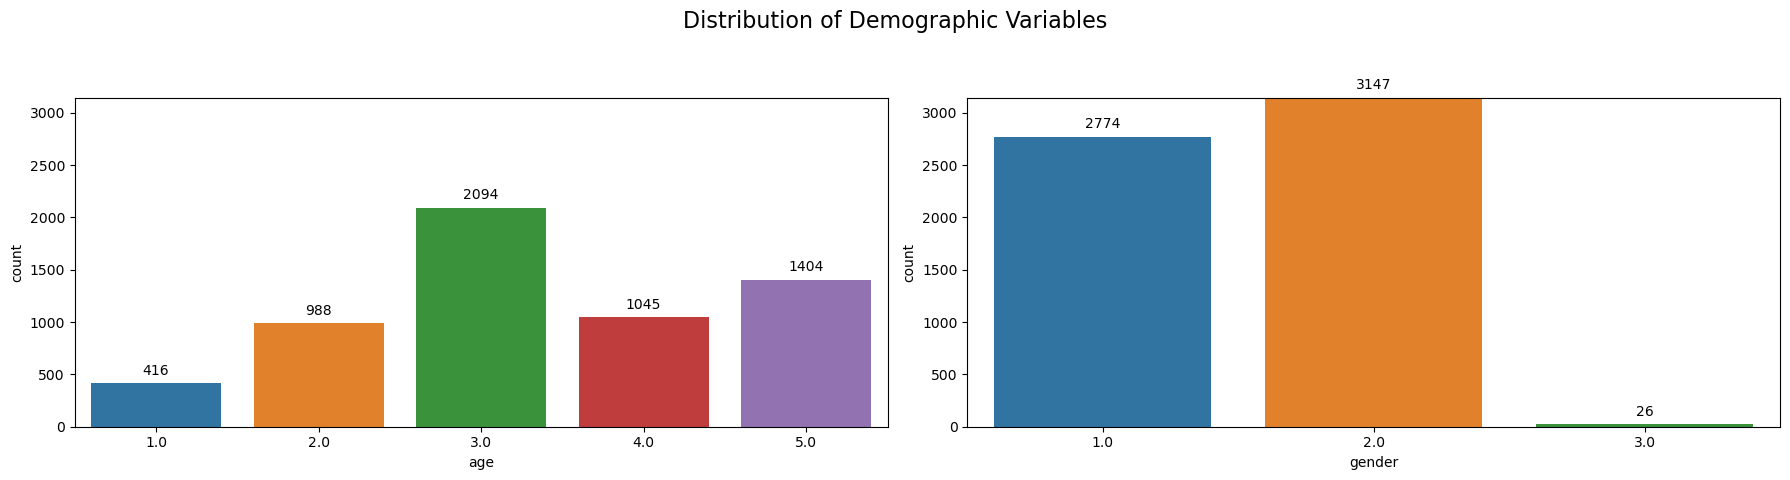

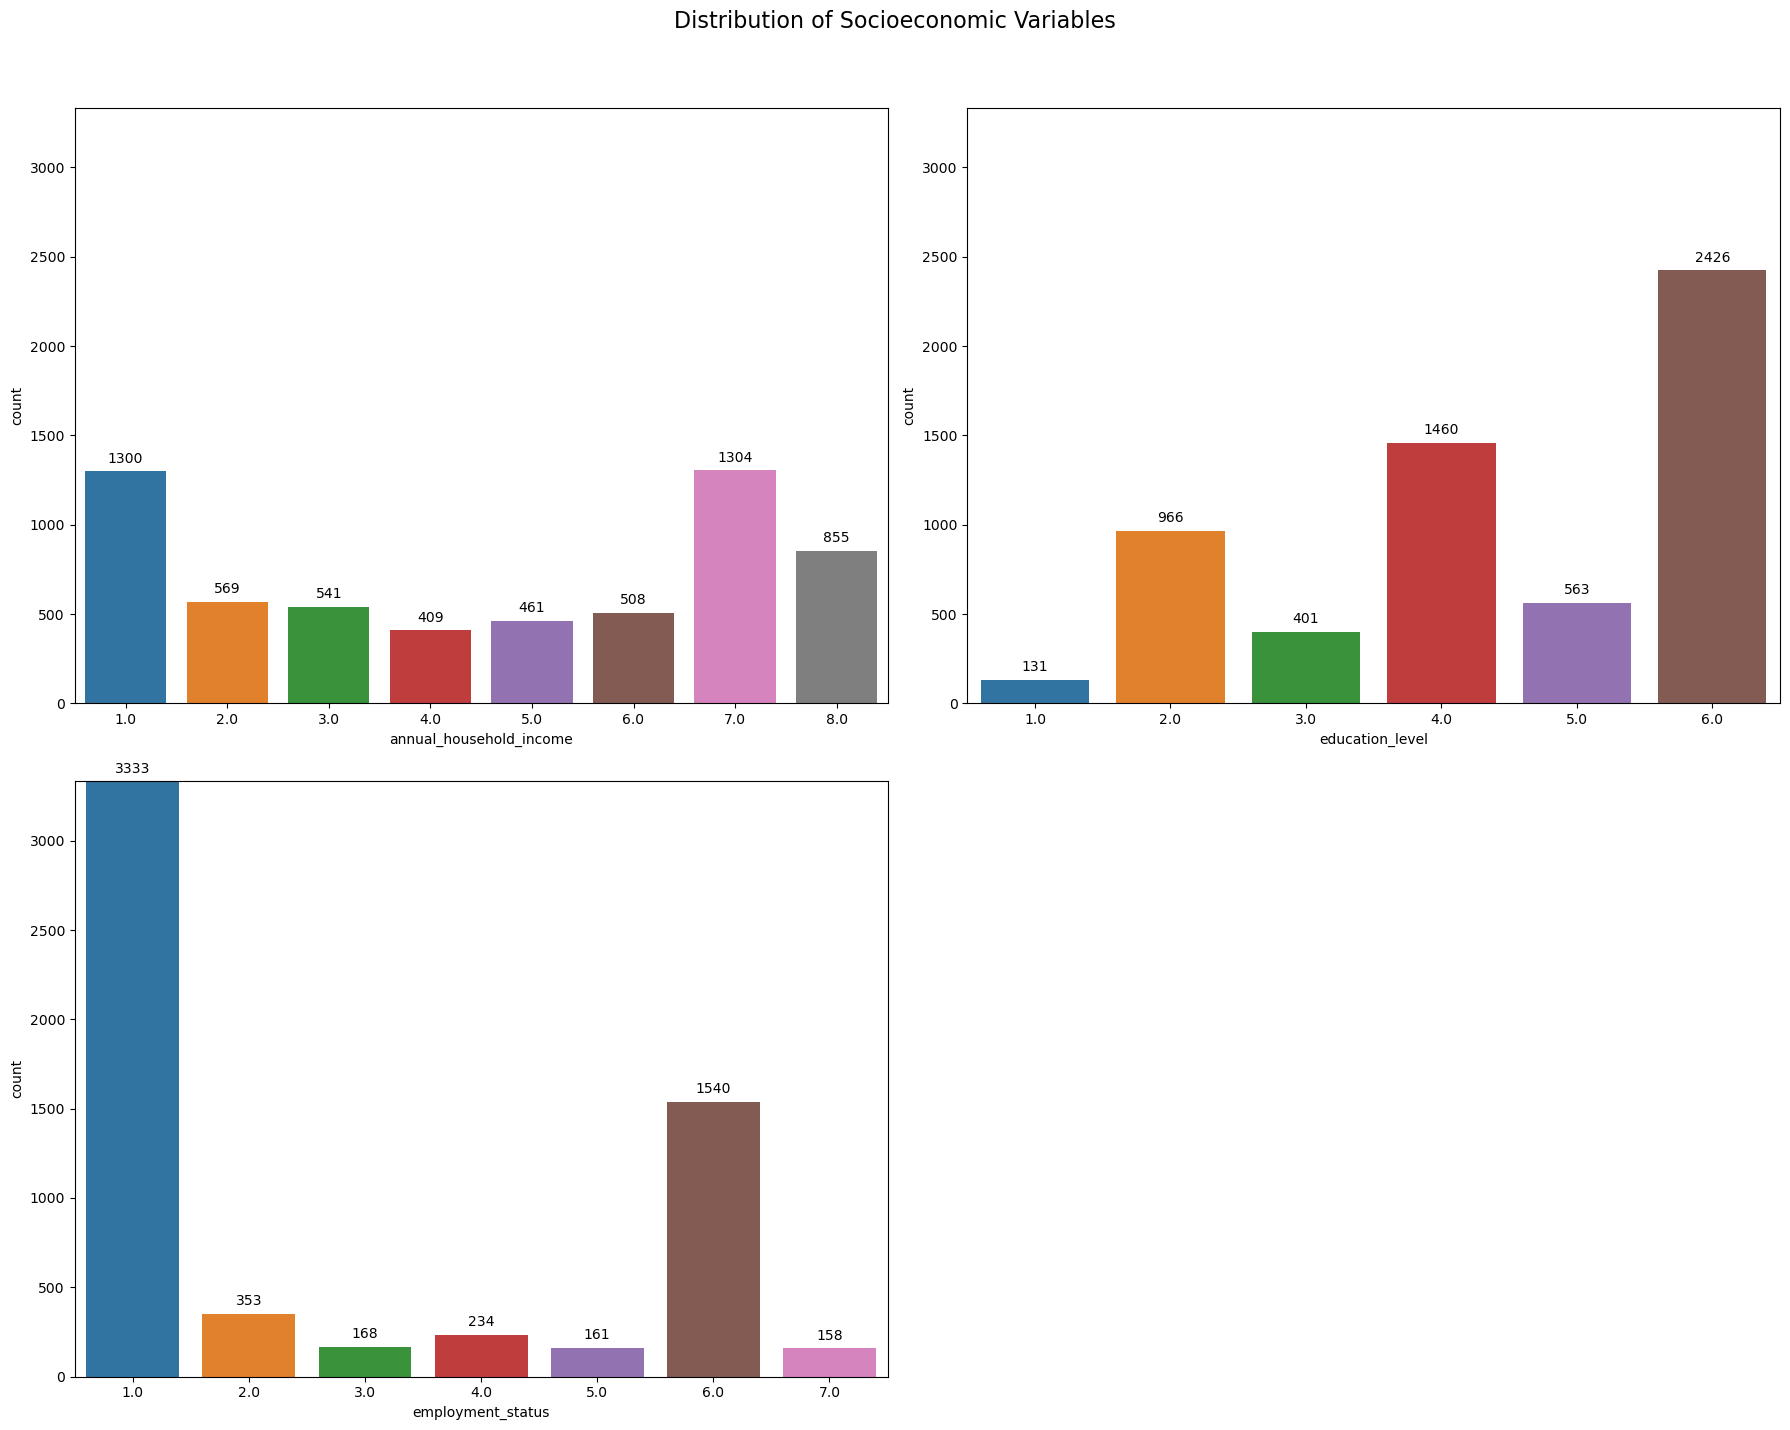

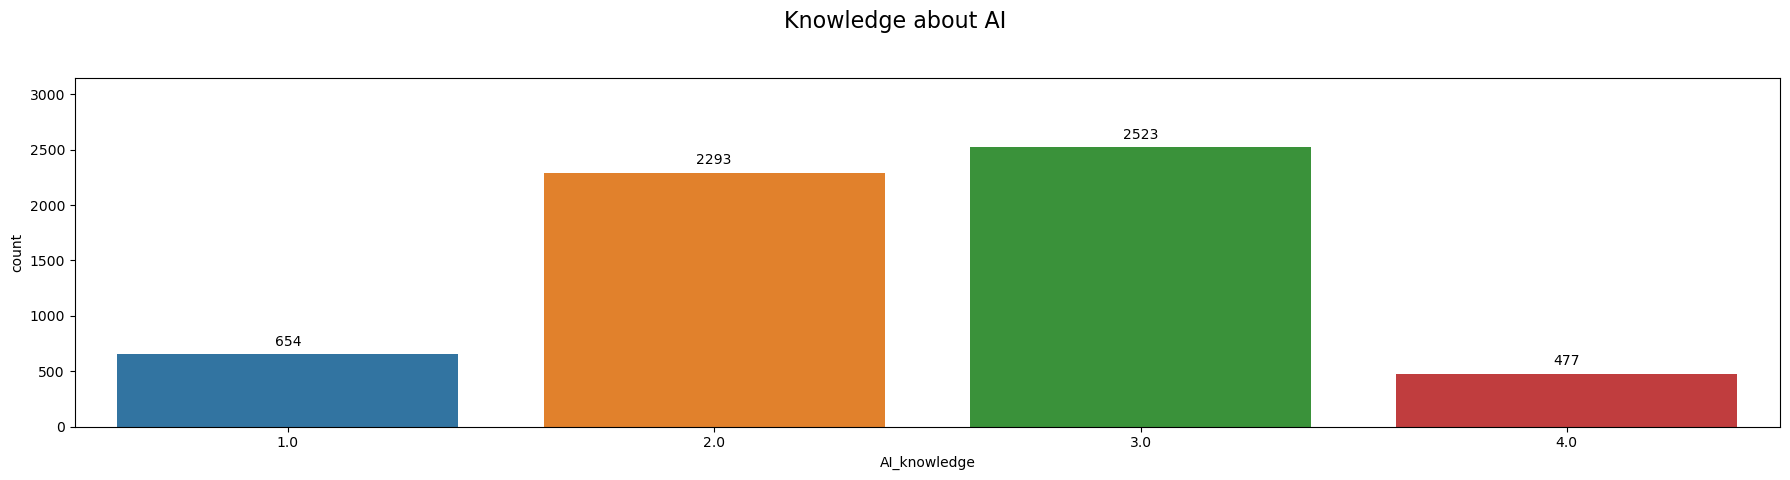

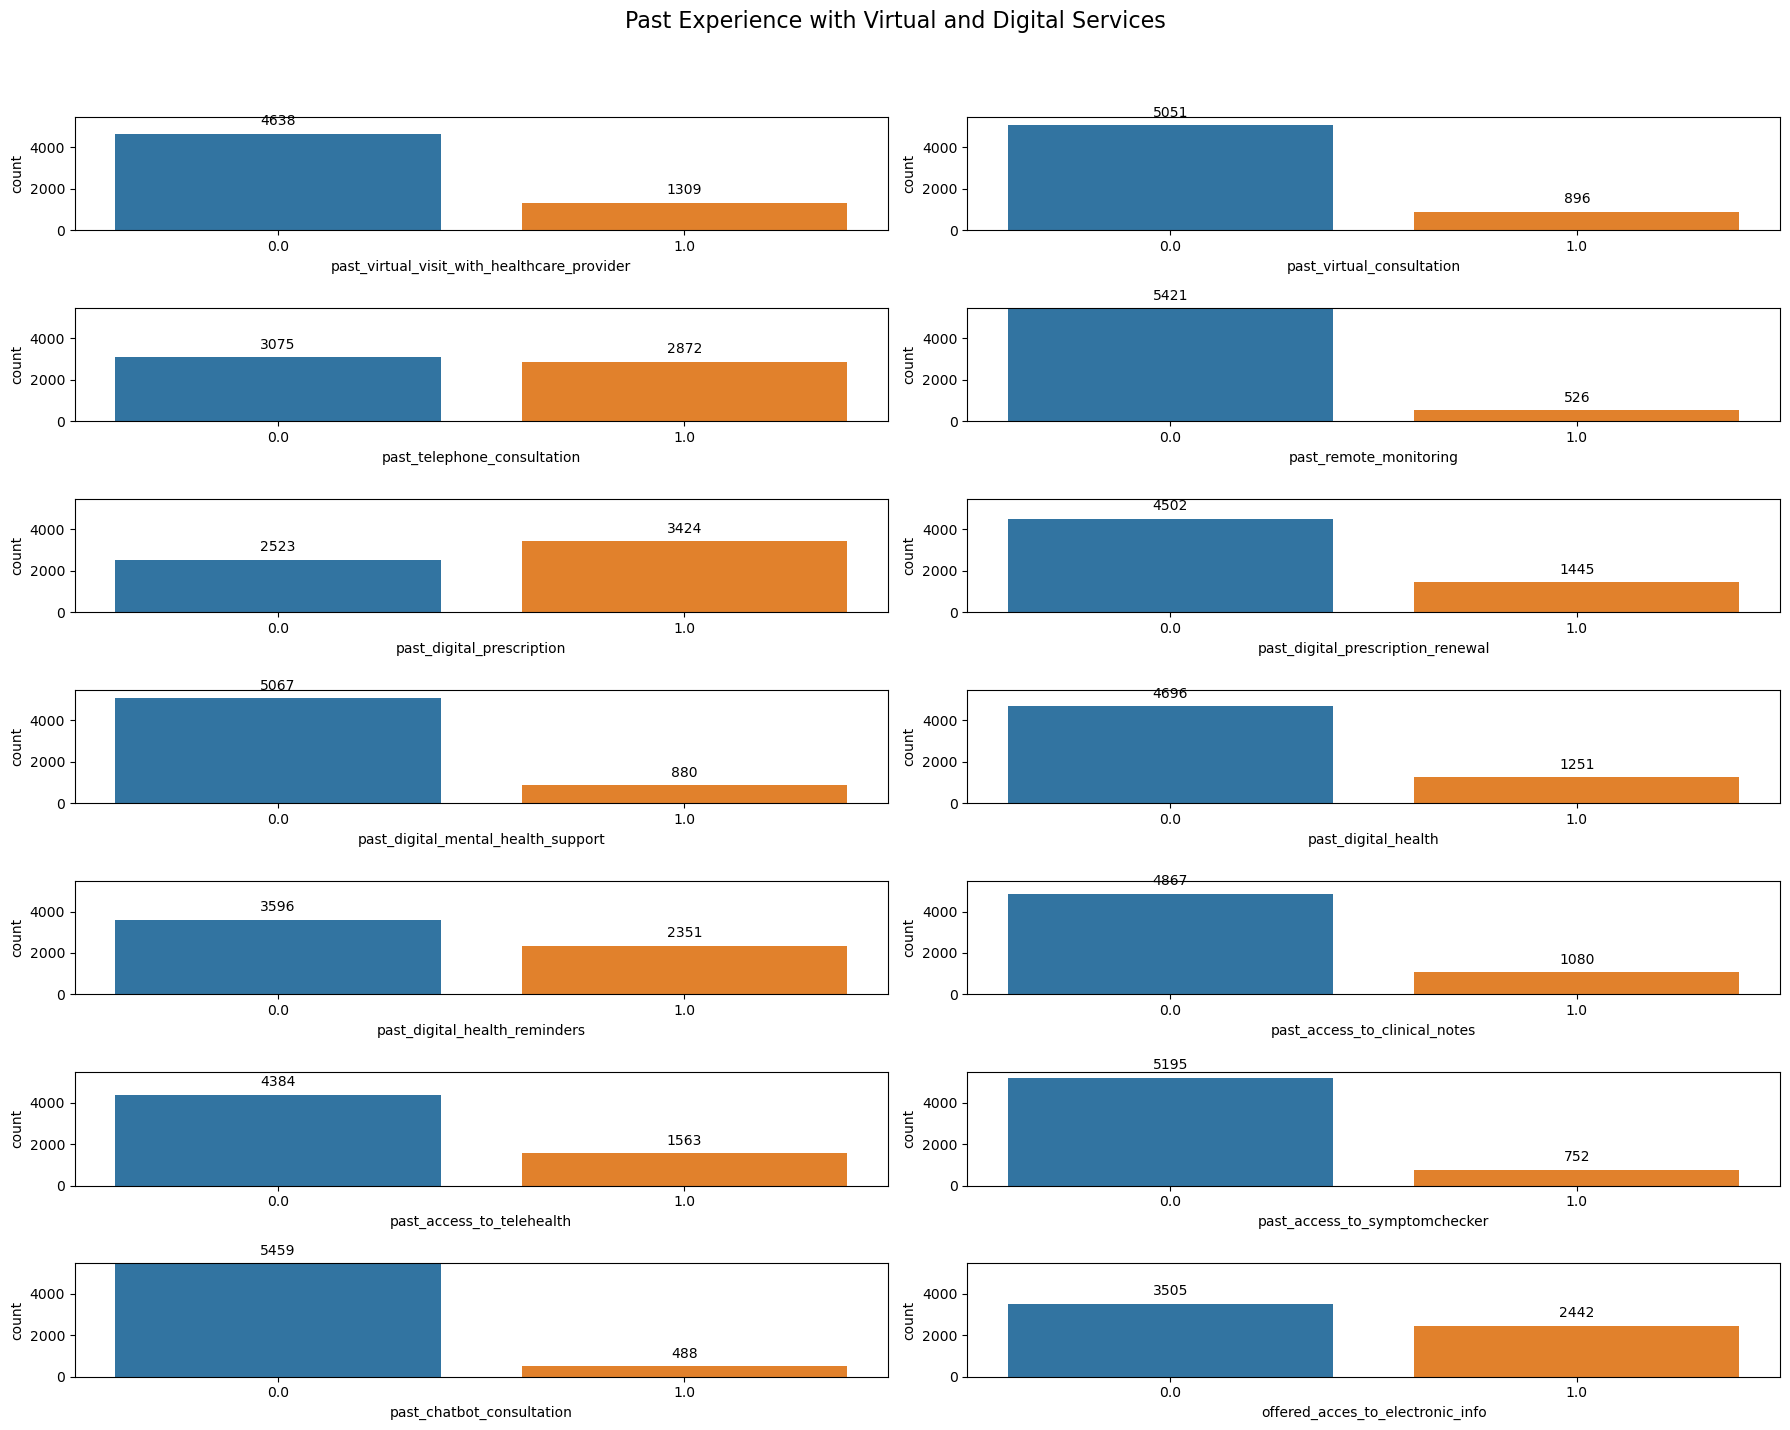

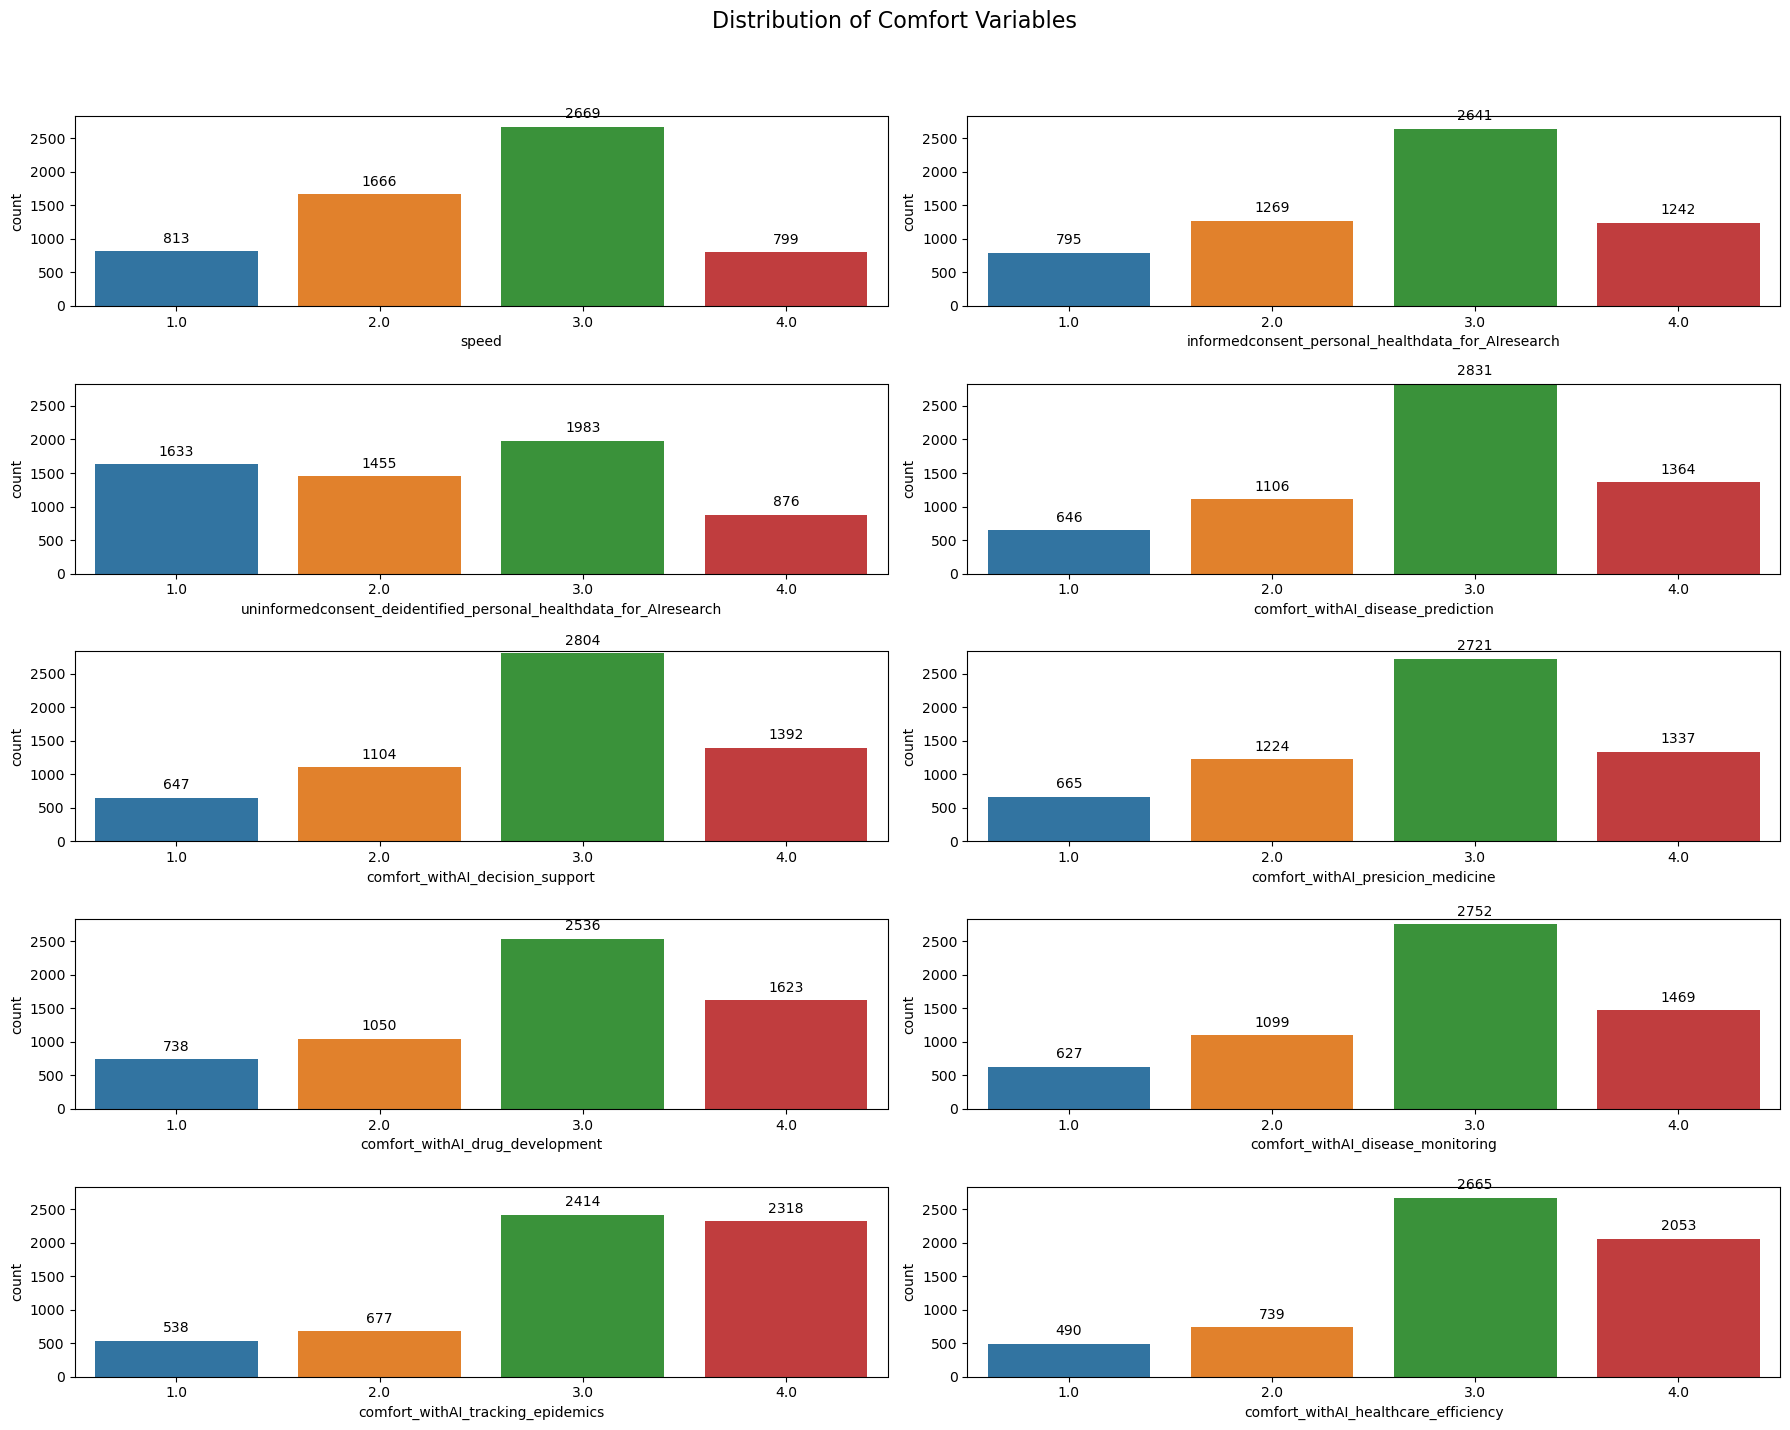

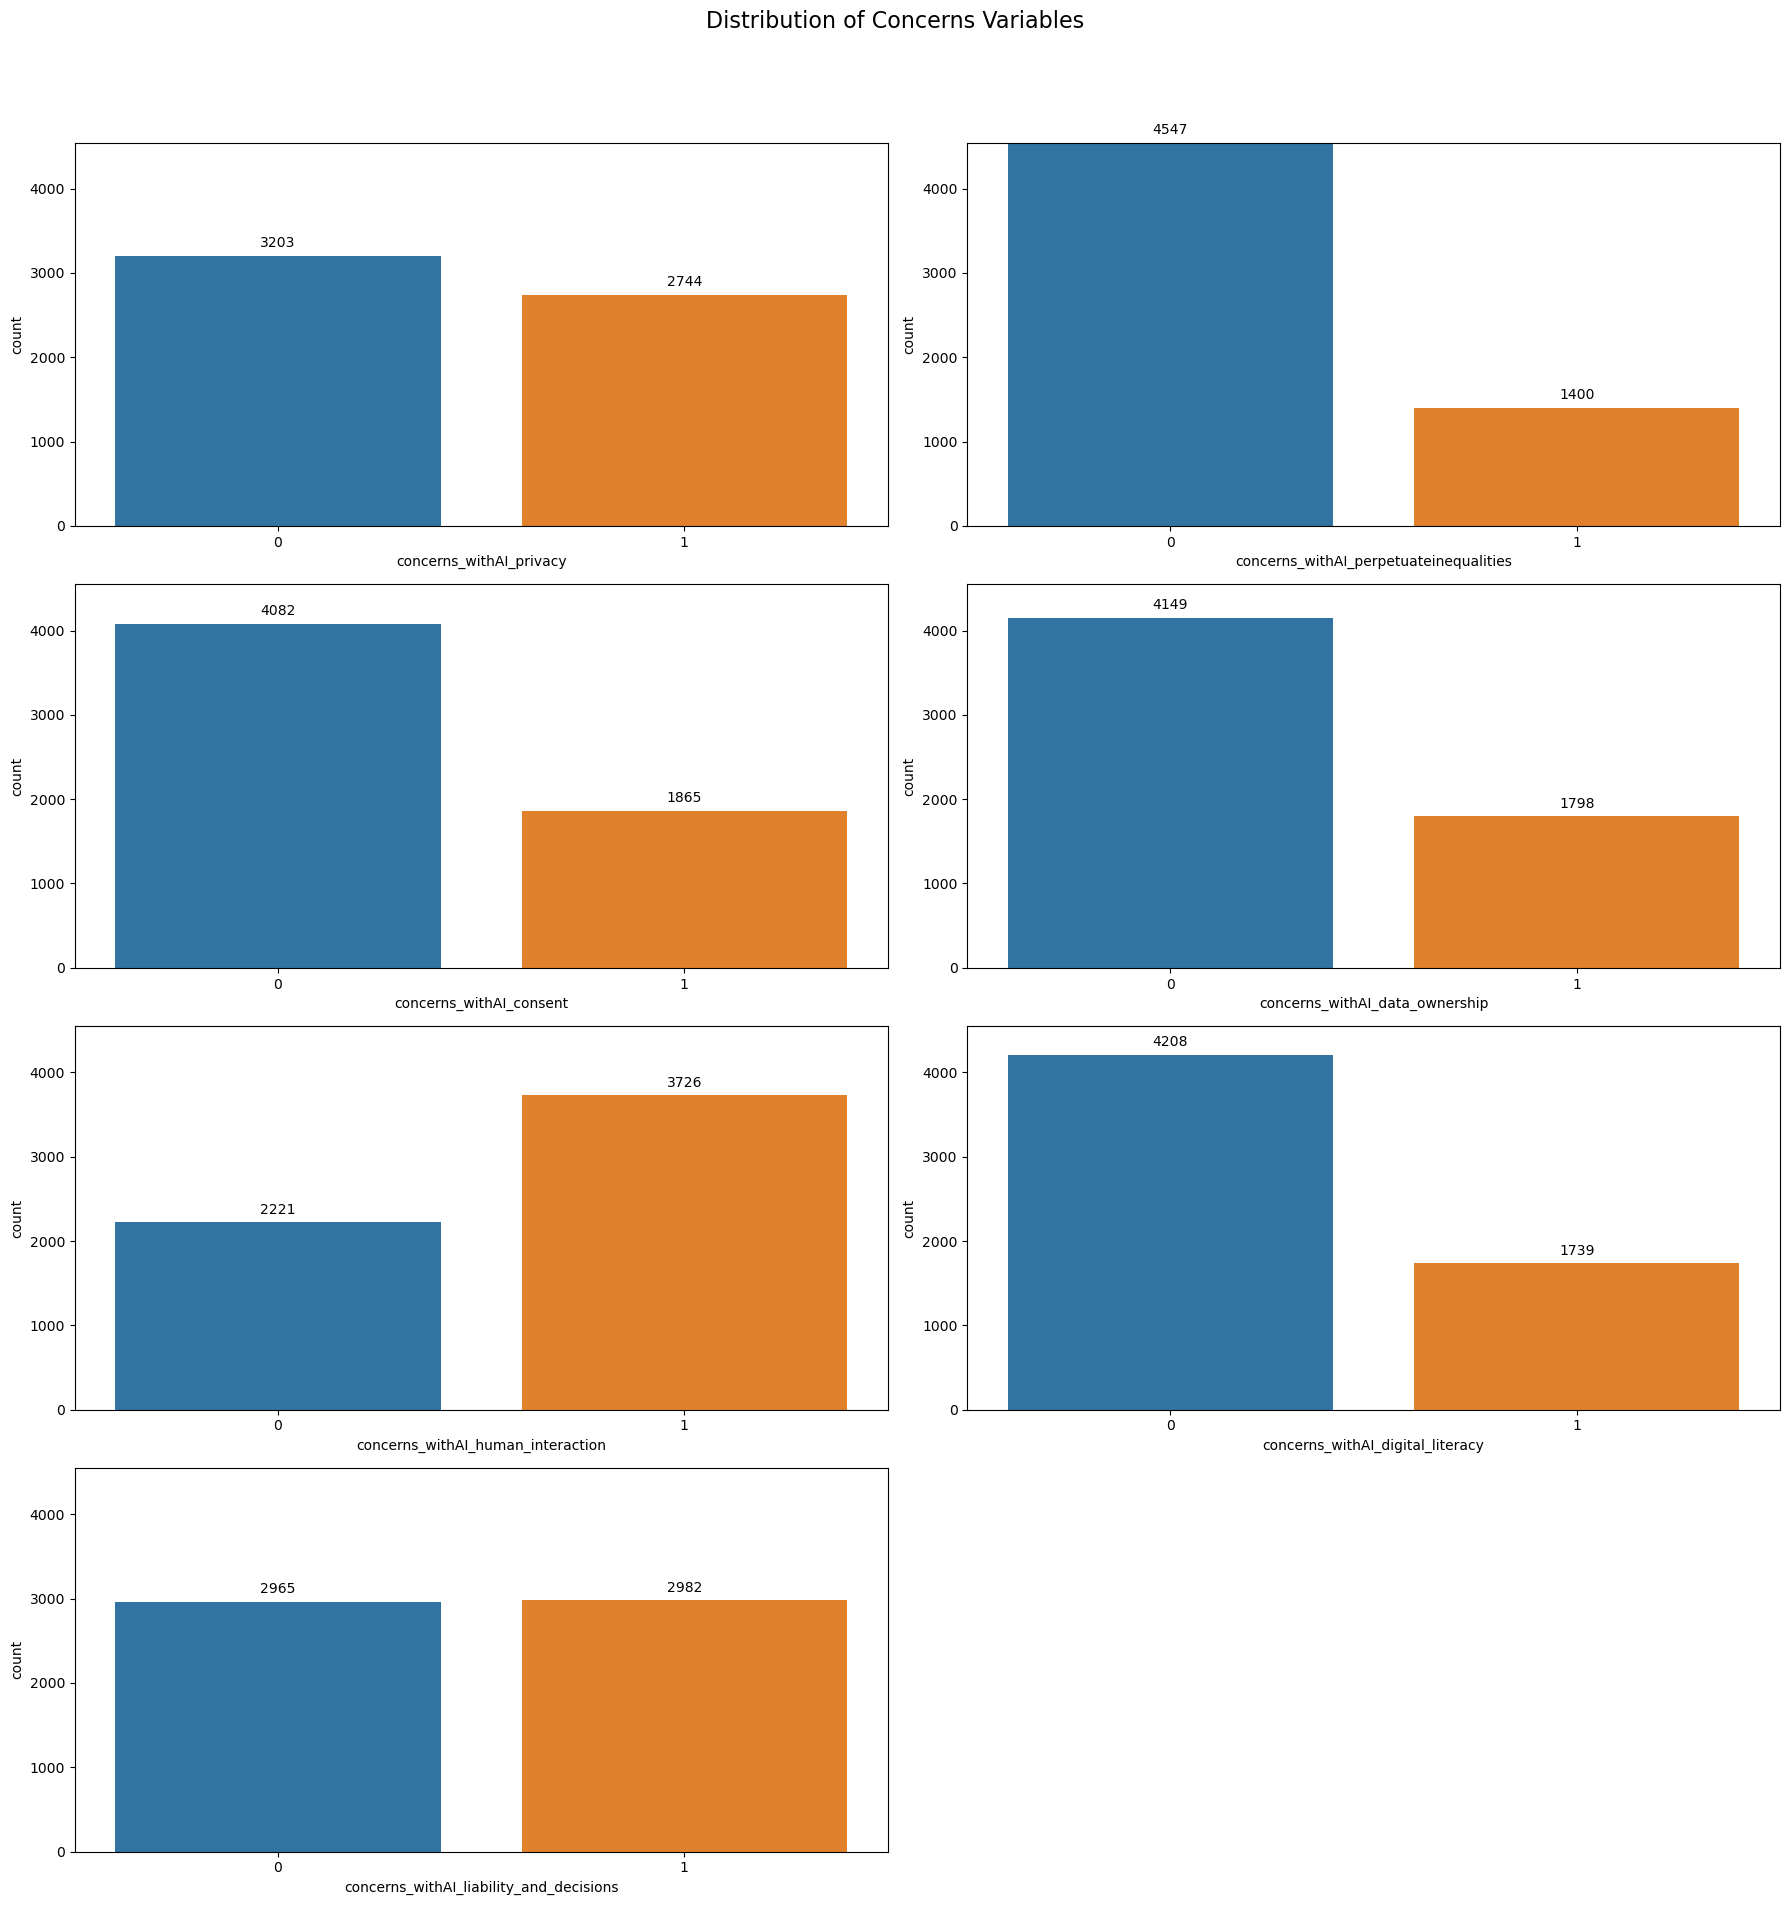

In [47]:
# Define the function to add data labels
def add_data_labels(ax):
    for p in ax.patches:
        height = p.get_height() if not pd.isna(p.get_height()) else 0
        ax.annotate(f'{height:.0f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')

# Function to determine the maximum y-axis limit across all variables
def get_max_ylim(variables, df):
    max_ylim = 0
    for var in variables:
        max_height = df[var].value_counts().max()
        if max_height > max_ylim:
            max_ylim = max_height
    return max_ylim

# Get max y-axis limit for all categories
max_ylim_demo = get_max_ylim(demographic_variables, df_selected)
max_ylim_socio = get_max_ylim(socioeconomic_variables, df_selected)
max_ylim_past = get_max_ylim(past_experience_variables, df_selected)
max_ylim_comfort = get_max_ylim(comfort_variables, df_selected)
max_ylim_concern = get_max_ylim(concern_variables, df_selected)

# Plotting the distribution of Demographic variables
fig, axes = plt.subplots(1, len(demographic_variables), figsize=(18, 5))
for i, var in enumerate(demographic_variables):
    ax = sns.countplot(x=var, data=df_selected, ax=axes[i])
    ax.set_ylim(0, max_ylim_demo)  # Set the y-limit
    add_data_labels(ax)
fig.suptitle('Distribution of Demographic Variables', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plotting the distribution of Socioeconomic variables
fig, axes = plt.subplots(len(socioeconomic_variables)//2 + len(socioeconomic_variables)%2, 2, figsize=(18, 15))  
axes = axes.flatten()
for i, var in enumerate(socioeconomic_variables):
    ax = sns.countplot(x=var, data=df_selected, ax=axes[i])
    ax.set_ylim(0, max_ylim_socio)  # Set the y-limit
    add_data_labels(ax)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
fig.suptitle('Distribution of Socioeconomic Variables', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plotting the distribution of AI Knowledge variable
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(x=knowledge_variable[0], data=df_selected, ax=ax)
ax.set_ylim(0, max_ylim_demo)  # Use same ylim if applicable
add_data_labels(ax)
fig.suptitle('Knowledge about AI', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plotting the distribution of Past experience variables
fig, axes = plt.subplots(len(past_experience_variables)//2 + len(past_experience_variables)%2, 2, figsize=(18, 15))  
axes = axes.flatten()
for i, var in enumerate(past_experience_variables):
    ax = sns.countplot(x=var, data=df_selected, ax=axes[i])
    ax.set_ylim(0, max_ylim_past)  # Set the y-limit
    add_data_labels(ax)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
fig.suptitle('Past Experience with Virtual and Digital Services', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plotting the distribution of Comfort variables
fig, axes = plt.subplots(len(comfort_variables)//2 + len(comfort_variables)%2, 2, figsize=(18, 15))  
axes = axes.flatten()
for i, var in enumerate(comfort_variables):
    ax = sns.countplot(x=var, data=df_selected, ax=axes[i])
    ax.set_ylim(0, max_ylim_comfort)  # Set the y-limit
    add_data_labels(ax)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
fig.suptitle('Distribution of Comfort Variables', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plotting the distribution of Concerns variables
fig, axes = plt.subplots(len(concern_variables)//2 + len(concern_variables)%2, 2, figsize=(18, 20))  
axes = axes.flatten()
for i, var in enumerate(concern_variables):
    ax = sns.countplot(x=var, data=df_selected, ax=axes[i])
    ax.set_ylim(0, max_ylim_concern)  # Set the y-limit
    add_data_labels(ax)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
fig.suptitle('Distribution of Concerns Variables', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Bivariate Analysis

Here, I will explore the relationships between different variables and visualise. I will beging with the demographic variables with the comfort and concerns respectively.

#### Bivariate Analysis of each all the variables, namely, demographic, socioeconomic, past experience with virtual services experience , AI knowledge, comfort and concerns variables, with concerns of AI will perpetuate inequality

While all other sets of variables are okay in their definition, I will recreate a new concerns variable that excludes the concerns of AI perpetuating inequality

In [51]:
from scipy.stats import chi2_contingency

other_concerns_vars = [
    'concerns_withAI_privacy', 'concerns_withAI_consent', 'concerns_withAI_data_ownership', 
    'concerns_withAI_human_interaction', 'concerns_withAI_digital_literacy', 
    'concerns_withAI_liability_and_decisions'
]

concern_about_AI_inequality = 'concerns_withAI_perpetuateinequalities'

# Function to add data labels
def add_data_labels(ax):
    for p in ax.patches:
        height = p.get_height() if not np.isnan(p.get_height()) else 0
        ax.annotate(f'{height:.0f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')

# Function to perform chi-square test and plot
def plot_bivariate_analysis_with_chi_square(main_vars, concern_var, df, title_prefix):
    num_main_vars = len(main_vars)
    num_cols = 3
    num_rows = math.ceil(num_main_vars / num_cols)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))
    fig.suptitle(f'{title_prefix}', fontsize=20)
    
    axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]
    
    for i, var in enumerate(main_vars):
        if i < len(axes):
            ax = sns.countplot(x=concern_var, hue=var, data=df, ax=axes[i], palette="Set1")
            add_data_labels(ax)
            axes[i].set_title(f'{var.replace("_", " ").title()} vs. {concern_var.replace("_", " ").title()}', fontsize=12, pad=15)
            axes[i].set_xlabel(concern_var.replace("_", " ").title())
            axes[i].set_ylabel('Count')
            axes[i].legend(title=var.replace("_", " ").title())
            axes[i].set_xticklabels(['No', 'Yes'])
            
            # Perform chi-square test
            crosstab = pd.crosstab(df[var], df[concern_var])
            chi2, p, dof, expected = chi2_contingency(crosstab)
            
            # Print chi-square test results
            print(f'Chi-square test results for {var} vs {concern_var}:')
            print(f'Chi2: {chi2:.2f}, p-value: {p:.4f}\n')
    
    # Remove any empty subplots
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes[j])
        
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


##### Demography and concern about AI perpetuating inequality

Chi-square test results for age vs concerns_withAI_perpetuateinequalities:
Chi2: 27.24, p-value: 0.0000

Chi-square test results for gender vs concerns_withAI_perpetuateinequalities:
Chi2: 10.92, p-value: 0.0043



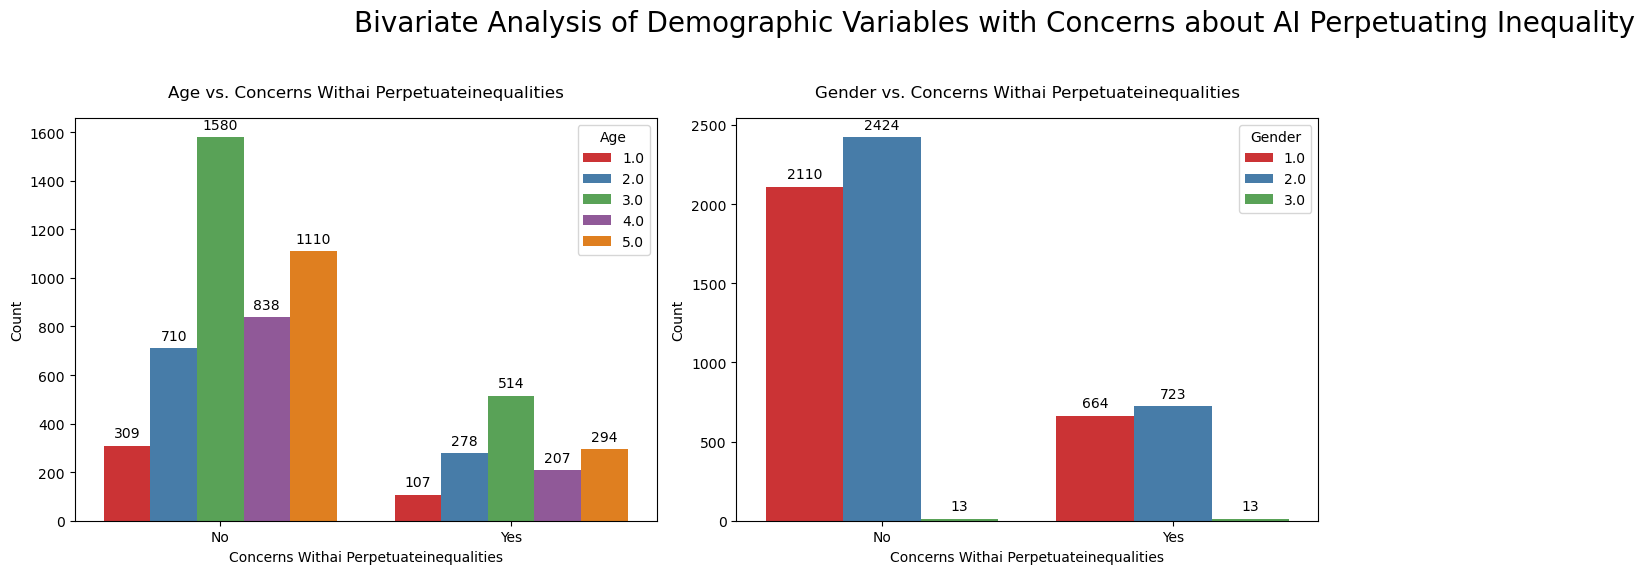

In [53]:
# Perform bivariate analysis for each set of variables

# Demographic variables
plot_bivariate_analysis_with_chi_square(demographic_variables, concern_about_AI_inequality, df_selected, 'Bivariate Analysis of Demographic Variables with Concerns about AI Perpetuating Inequality')

##### Socioeconomic factors and concern about AI perpetuating inequality

Chi-square test results for annual_household_income vs concerns_withAI_perpetuateinequalities:
Chi2: 4.04, p-value: 0.7755

Chi-square test results for education_level vs concerns_withAI_perpetuateinequalities:
Chi2: 20.57, p-value: 0.0010

Chi-square test results for employment_status vs concerns_withAI_perpetuateinequalities:
Chi2: 19.84, p-value: 0.0030



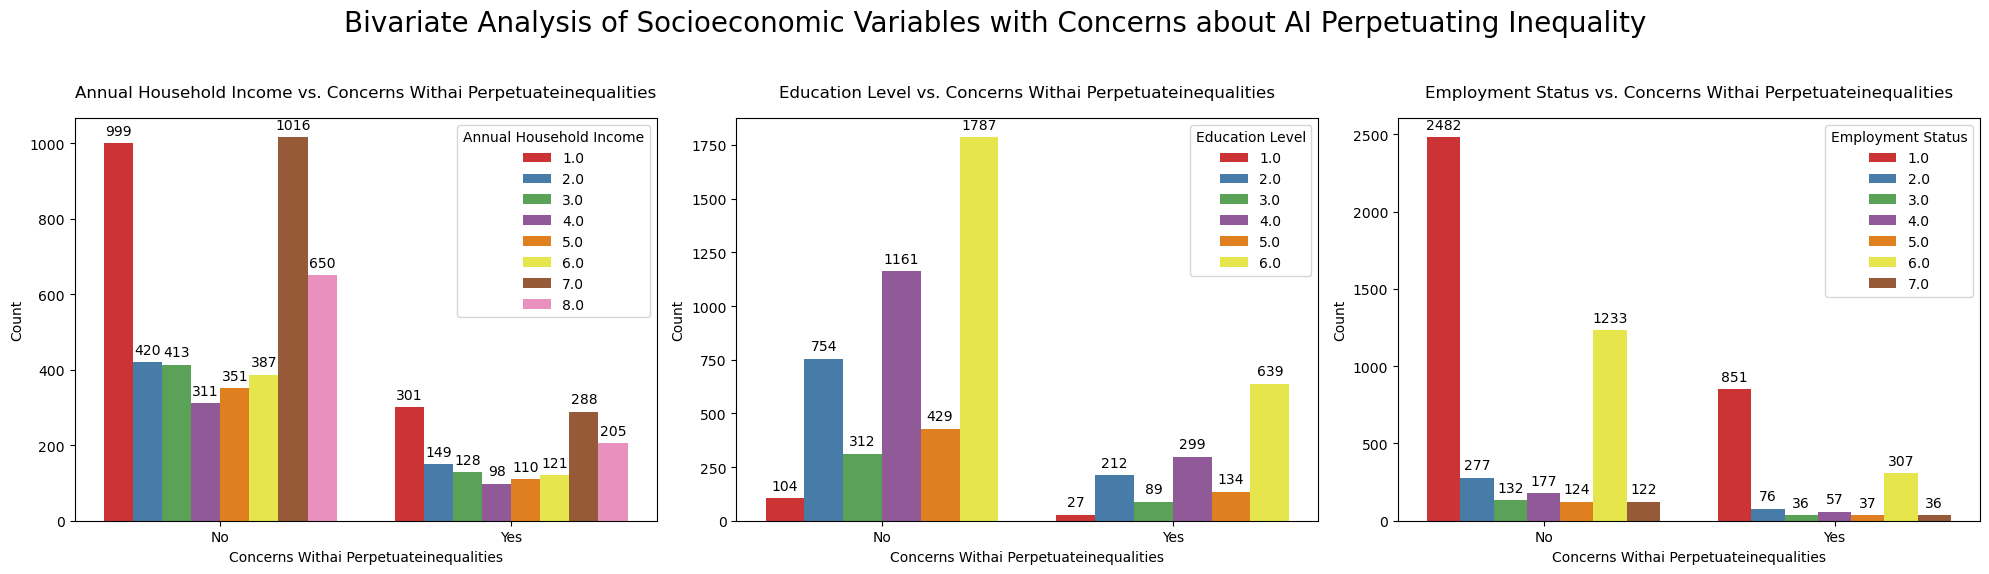

In [55]:
# Socioeconomic variables
plot_bivariate_analysis_with_chi_square(socioeconomic_variables, concern_about_AI_inequality, df_selected, 'Bivariate Analysis of Socioeconomic Variables with Concerns about AI Perpetuating Inequality')



##### Knowledge and concern about AI perpetuating inequality

Chi-square test results for AI_knowledge vs concerns_withAI_perpetuateinequalities:
Chi2: 8.46, p-value: 0.0374



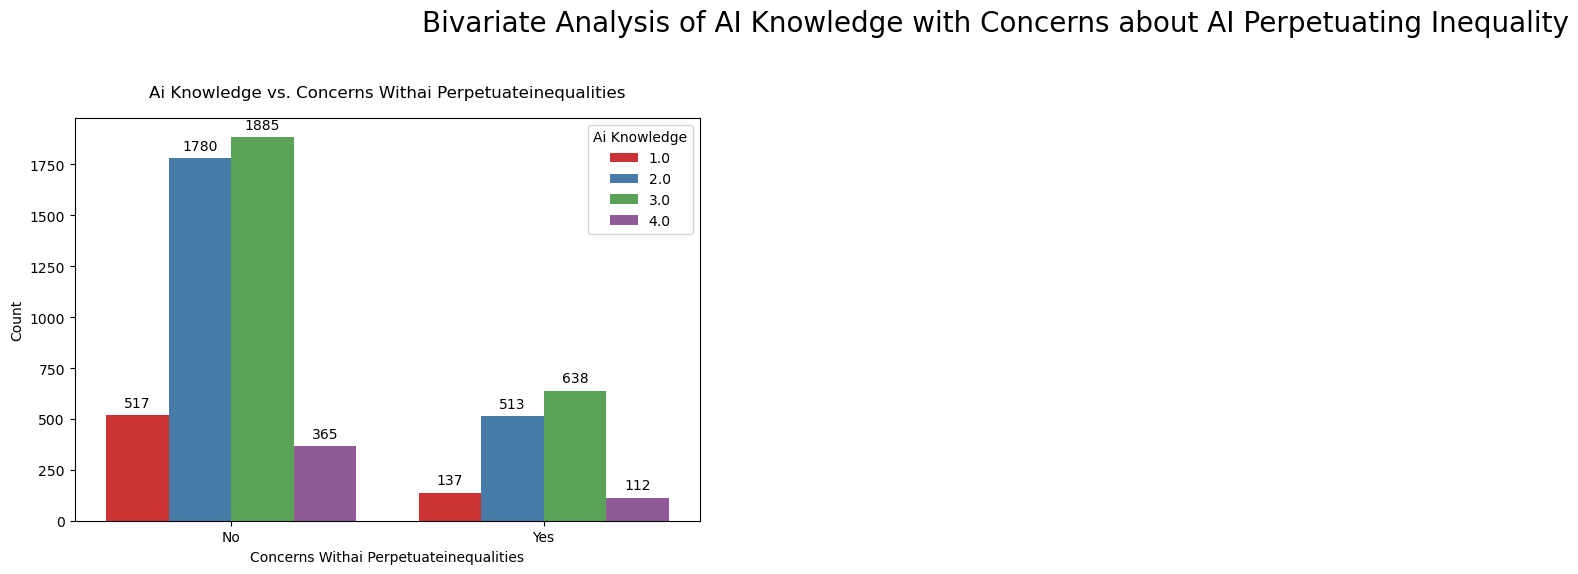

In [57]:
# AI Knowledge variable
plot_bivariate_analysis_with_chi_square(knowledge_variable, concern_about_AI_inequality, df_selected, 'Bivariate Analysis of AI Knowledge with Concerns about AI Perpetuating Inequality')


##### Past experience and concern about AI perpetuating inequality

Chi-square test results for past_virtual_visit_with_healthcare_provider vs concerns_withAI_perpetuateinequalities:
Chi2: 8.00, p-value: 0.0047

Chi-square test results for past_virtual_consultation vs concerns_withAI_perpetuateinequalities:
Chi2: 3.72, p-value: 0.0538

Chi-square test results for past_telephone_consultation vs concerns_withAI_perpetuateinequalities:
Chi2: 2.05, p-value: 0.1525

Chi-square test results for past_remote_monitoring vs concerns_withAI_perpetuateinequalities:
Chi2: 10.20, p-value: 0.0014

Chi-square test results for past_digital_prescription vs concerns_withAI_perpetuateinequalities:
Chi2: 0.05, p-value: 0.8312

Chi-square test results for past_digital_prescription_renewal vs concerns_withAI_perpetuateinequalities:
Chi2: 6.70, p-value: 0.0096

Chi-square test results for past_digital_mental_health_support vs concerns_withAI_perpetuateinequalities:
Chi2: 18.04, p-value: 0.0000

Chi-square test results for past_digital_health vs concerns_withAI_perpetuateinequ

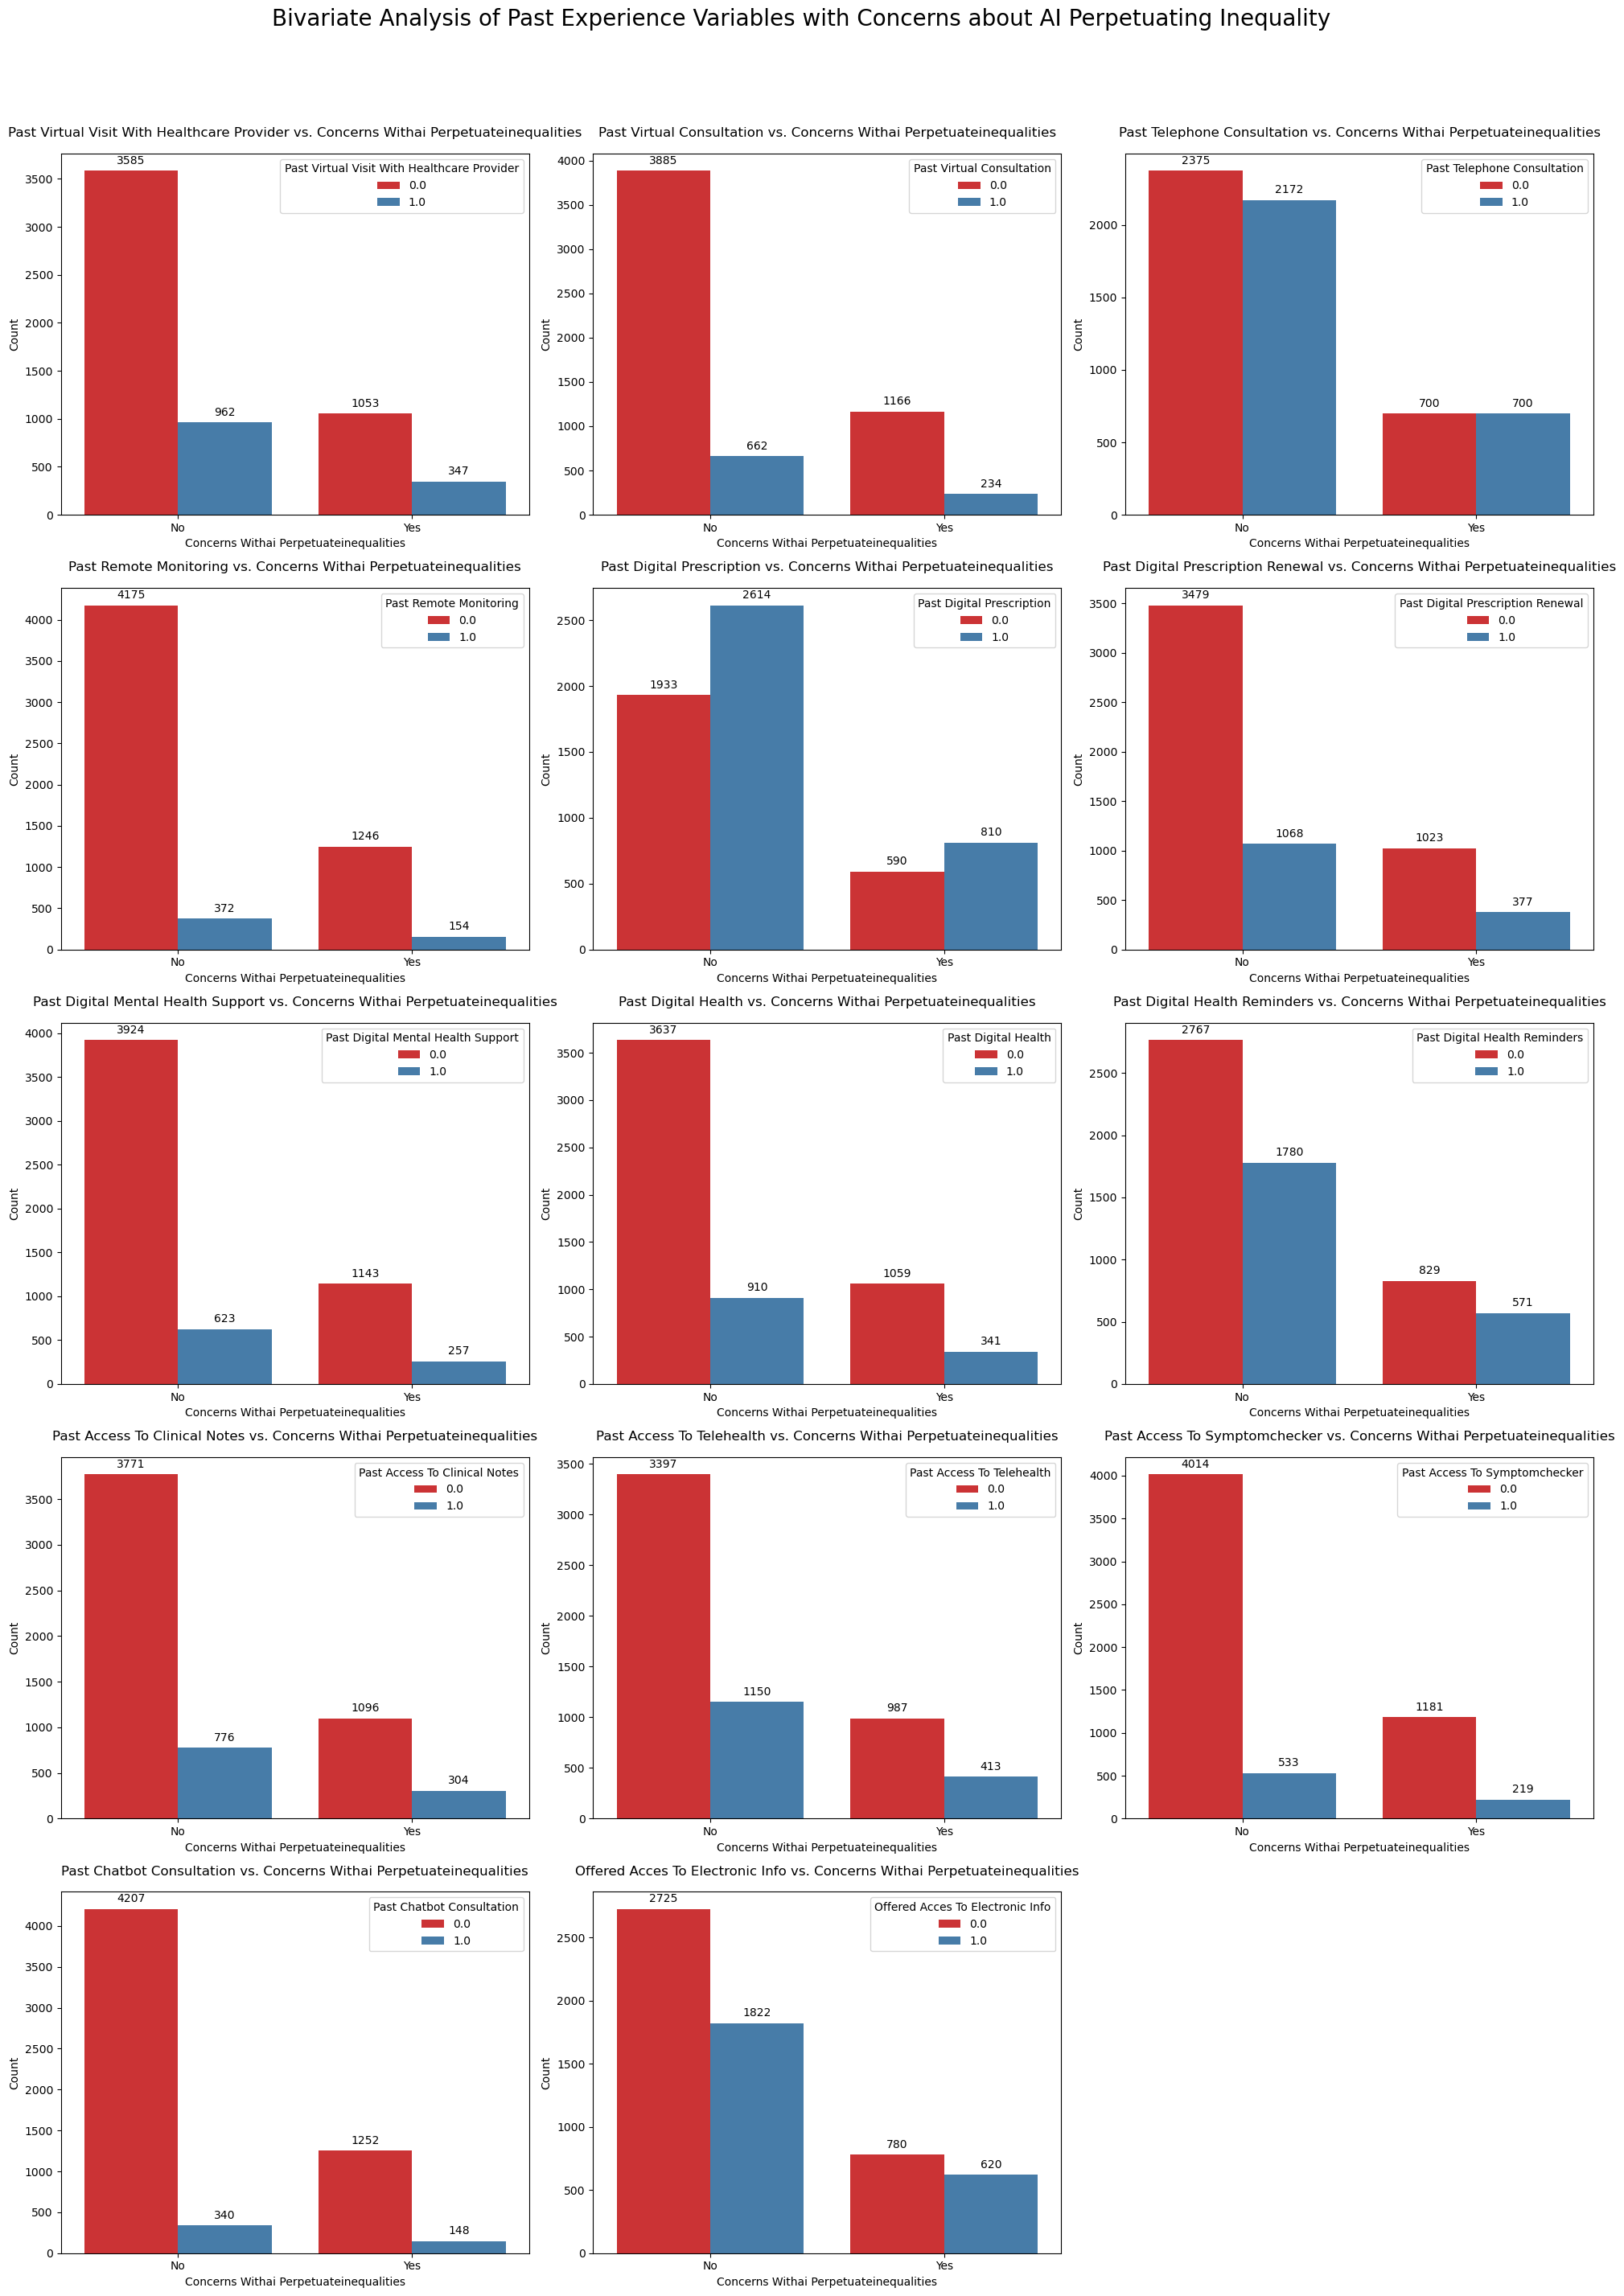

In [59]:
# Past Experience variables
plot_bivariate_analysis_with_chi_square(past_experience_variables, concern_about_AI_inequality, df_selected, 'Bivariate Analysis of Past Experience Variables with Concerns about AI Perpetuating Inequality')


##### Comfort with AI application in healthcare and concern about AI perpetuating inequality

Chi-square test results for speed vs concerns_withAI_perpetuateinequalities:
Chi2: 7.26, p-value: 0.0641

Chi-square test results for informedconsent_personal_healthdata_for_AIresearch vs concerns_withAI_perpetuateinequalities:
Chi2: 15.04, p-value: 0.0018

Chi-square test results for uninformedconsent_deidentified_personal_healthdata_for_AIresearch vs concerns_withAI_perpetuateinequalities:
Chi2: 27.72, p-value: 0.0000

Chi-square test results for comfort_withAI_disease_prediction vs concerns_withAI_perpetuateinequalities:
Chi2: 4.80, p-value: 0.1874

Chi-square test results for comfort_withAI_decision_support vs concerns_withAI_perpetuateinequalities:
Chi2: 5.71, p-value: 0.1266

Chi-square test results for comfort_withAI_presicion_medicine vs concerns_withAI_perpetuateinequalities:
Chi2: 5.67, p-value: 0.1286

Chi-square test results for comfort_withAI_drug_development vs concerns_withAI_perpetuateinequalities:
Chi2: 17.87, p-value: 0.0005

Chi-square test results for comfort_withAI

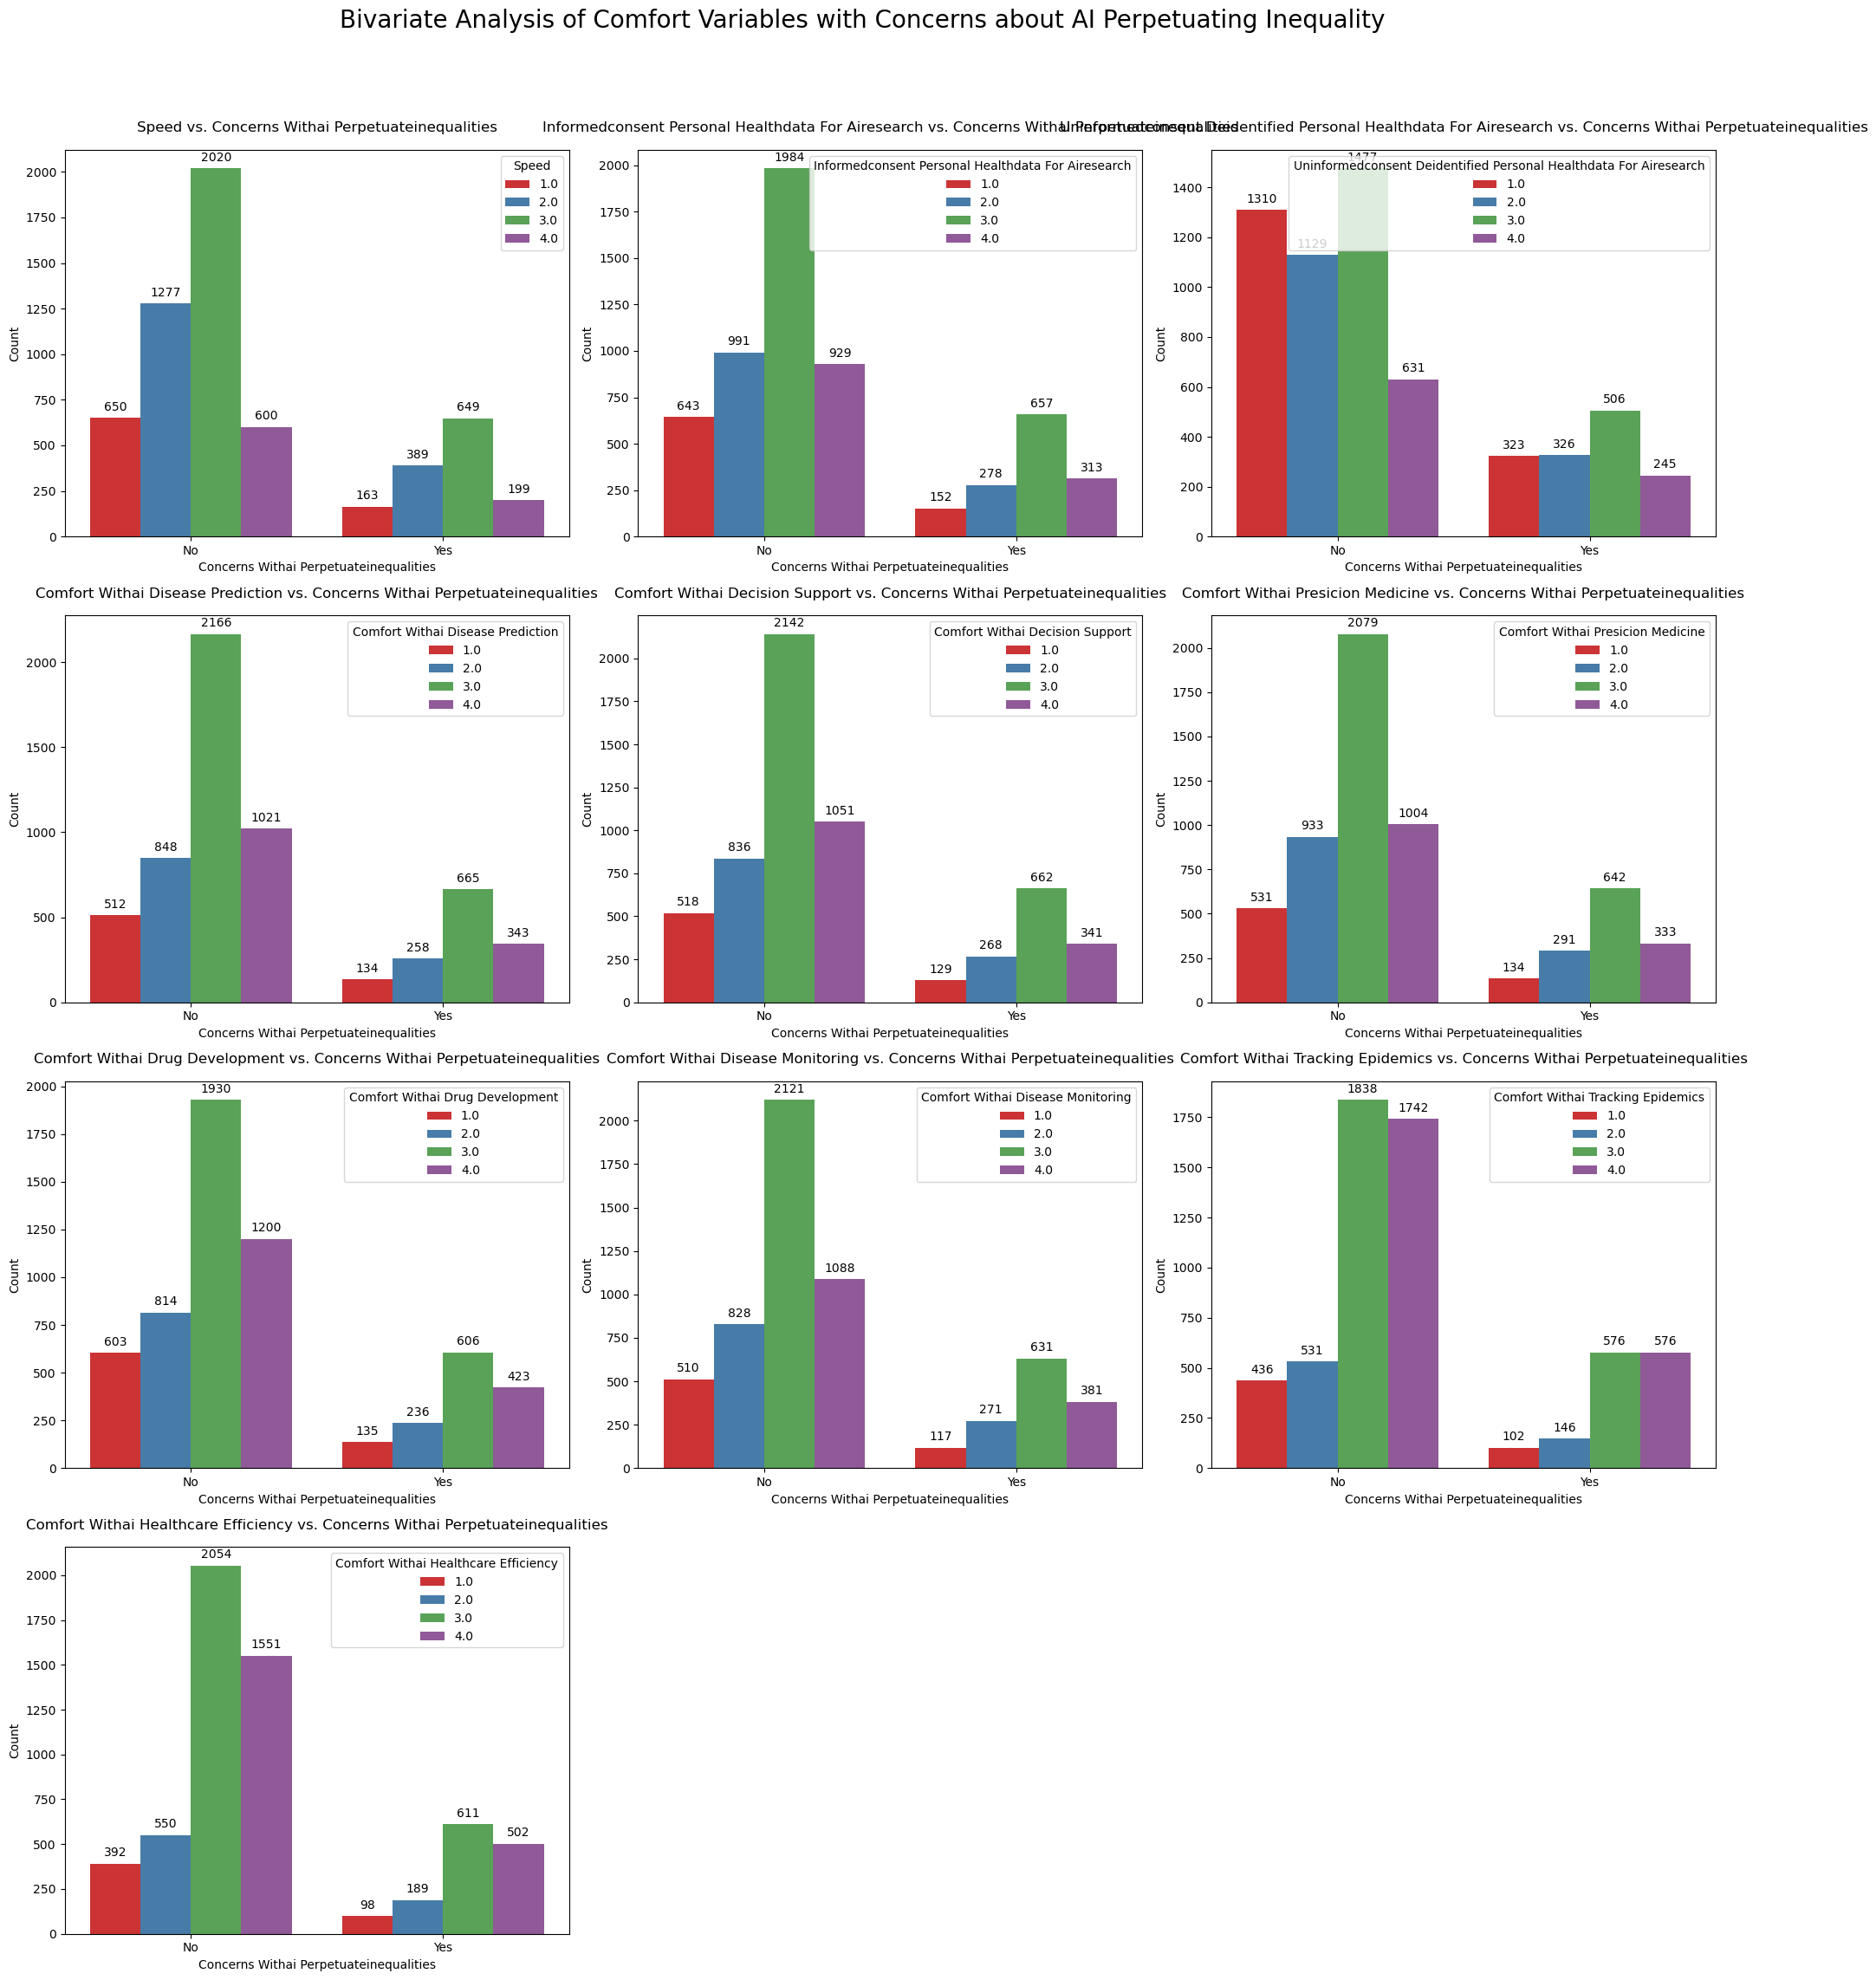

In [61]:
# Comfort variables
plot_bivariate_analysis_with_chi_square(comfort_variables, concern_about_AI_inequality, df_selected, 'Bivariate Analysis of Comfort Variables with Concerns about AI Perpetuating Inequality')


##### Other concerns and concerns about AI perpetuating inequality

Chi-square test results for concerns_withAI_privacy vs concerns_withAI_perpetuateinequalities:
Chi2: 114.43, p-value: 0.0000

Chi-square test results for concerns_withAI_consent vs concerns_withAI_perpetuateinequalities:
Chi2: 100.99, p-value: 0.0000

Chi-square test results for concerns_withAI_data_ownership vs concerns_withAI_perpetuateinequalities:
Chi2: 63.54, p-value: 0.0000

Chi-square test results for concerns_withAI_human_interaction vs concerns_withAI_perpetuateinequalities:
Chi2: 35.01, p-value: 0.0000

Chi-square test results for concerns_withAI_digital_literacy vs concerns_withAI_perpetuateinequalities:
Chi2: 8.30, p-value: 0.0040

Chi-square test results for concerns_withAI_liability_and_decisions vs concerns_withAI_perpetuateinequalities:
Chi2: 66.60, p-value: 0.0000



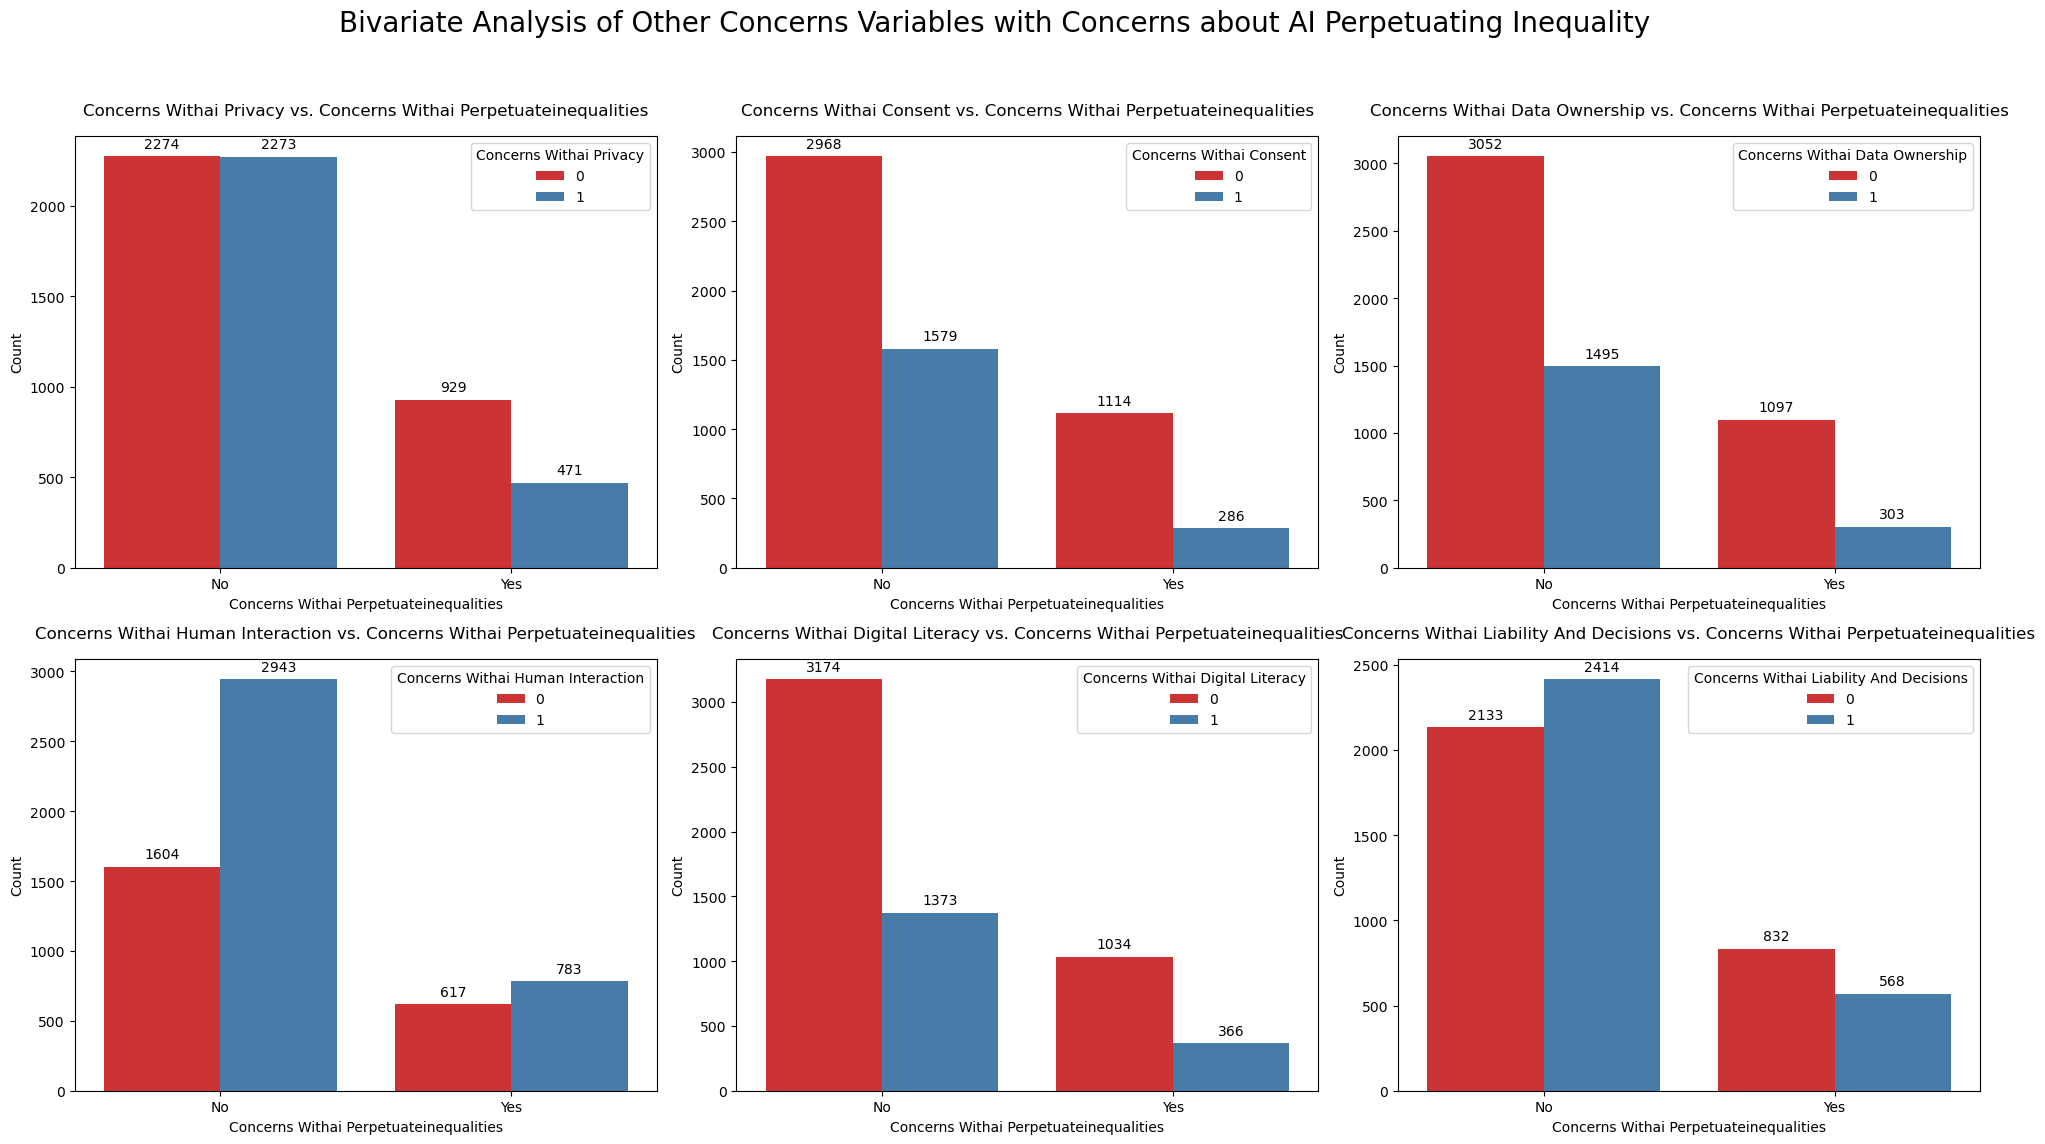

In [63]:
# Other Concerns variables
plot_bivariate_analysis_with_chi_square(other_concerns_vars, concern_about_AI_inequality, df_selected, 'Bivariate Analysis of Other Concerns Variables with Concerns about AI Perpetuating Inequality')

### Logistic Regression

The logistic regression to understand the effects of the variables on concerns about AI perpetuating inequalities. I will run the logistic regression seperately to understand their independent effects on the concerns about AI perpetuating inequality.

#### Logistic regression for demography

In [66]:
# Function to run logistic regression and summarize results
def run_logistic_regression(variables, dependent_var):
    X = df_selected[variables]
    y = df_selected[dependent_var]
    X = sm.add_constant(X)
    model = sm.Logit(y, X)
    result = model.fit()
    return result.summary()

# Logistic Regression for Demographic Variables
demographic_results = run_logistic_regression(demographic_variables, concern_about_AI_inequality)
print("Logistic Regression Results for Demographic Variables:")
print(demographic_results)



Optimization terminated successfully.
         Current function value: 0.544060
         Iterations 5
Logistic Regression Results for Demographic Variables:
                                     Logit Regression Results                                     
Dep. Variable:     concerns_withAI_perpetuateinequalities   No. Observations:                 5947
Model:                                              Logit   Df Residuals:                     5944
Method:                                               MLE   Df Model:                            2
Date:                                    Tue, 20 Aug 2024   Pseudo R-squ.:                0.003069
Time:                                            04:24:28   Log-Likelihood:                -3235.5
converged:                                           True   LL-Null:                       -3245.5
Covariance Type:                                nonrobust   LLR p-value:                 4.722e-05
                 coef    std err          z      P>

#### Logistic regression for socioeconomic variable

In [68]:
# Logistic Regression for Socioeconomic Variables
socioeconomic_results = run_logistic_regression(socioeconomic_variables, concern_about_AI_inequality)
print("\nLogistic Regression Results for Socioeconomic Variables:")
print(socioeconomic_results)



Optimization terminated successfully.
         Current function value: 0.543028
         Iterations 5

Logistic Regression Results for Socioeconomic Variables:
                                     Logit Regression Results                                     
Dep. Variable:     concerns_withAI_perpetuateinequalities   No. Observations:                 5947
Model:                                              Logit   Df Residuals:                     5943
Method:                                               MLE   Df Model:                            3
Date:                                    Tue, 20 Aug 2024   Pseudo R-squ.:                0.004959
Time:                                            04:24:28   Log-Likelihood:                -3229.4
converged:                                           True   LL-Null:                       -3245.5
Covariance Type:                                nonrobust   LLR p-value:                 4.769e-07
                              coef    std err   

#### Logistic Regression for past experience with AI and digital services variable

In [70]:
# Logistic Regression for Interest in Virtual Services Variables
interest_results = run_logistic_regression(past_experience_variables, concern_about_AI_inequality)
print("\nLogistic Regression Results for Past Experience with Virtual and Digital Variables:")
print(interest_results)



Optimization terminated successfully.
         Current function value: 0.542187
         Iterations 5

Logistic Regression Results for Past Experience with Virtual and Digital Variables:
                                     Logit Regression Results                                     
Dep. Variable:     concerns_withAI_perpetuateinequalities   No. Observations:                 5947
Model:                                              Logit   Df Residuals:                     5932
Method:                                               MLE   Df Model:                           14
Date:                                    Tue, 20 Aug 2024   Pseudo R-squ.:                0.006500
Time:                                            04:24:28   Log-Likelihood:                -3224.4
converged:                                           True   LL-Null:                       -3245.5
Covariance Type:                                nonrobust   LLR p-value:                 0.0001152
                     

#### Logistic Regression for Comfort

In [72]:
# Logistic Regression for Comfort Variables
comfort_results = run_logistic_regression(comfort_variables, concern_about_AI_inequality)
print("\nLogistic Regression Results for Comfort Variables:")
print(comfort_results)



Optimization terminated successfully.
         Current function value: 0.541856
         Iterations 5

Logistic Regression Results for Comfort Variables:
                                     Logit Regression Results                                     
Dep. Variable:     concerns_withAI_perpetuateinequalities   No. Observations:                 5947
Model:                                              Logit   Df Residuals:                     5936
Method:                                               MLE   Df Model:                           10
Date:                                    Tue, 20 Aug 2024   Pseudo R-squ.:                0.007106
Time:                                            04:24:28   Log-Likelihood:                -3222.4
converged:                                           True   LL-Null:                       -3245.5
Covariance Type:                                nonrobust   LLR p-value:                 1.361e-06
                                                      

#### Logistic regression for other concerns

In [74]:
X = pd.get_dummies(df_selected[other_concerns_vars], drop_first=True)
y = df_selected['concerns_withAI_perpetuateinequalities']

# Add constant to the model
X = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X).fit()

# Display results
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.491197
         Iterations 6
                                     Logit Regression Results                                     
Dep. Variable:     concerns_withAI_perpetuateinequalities   No. Observations:                 5947
Model:                                              Logit   Df Residuals:                     5940
Method:                                               MLE   Df Model:                            6
Date:                                    Tue, 20 Aug 2024   Pseudo R-squ.:                 0.09993
Time:                                            04:24:28   Log-Likelihood:                -2921.1
converged:                                           True   LL-Null:                       -3245.5
Covariance Type:                                nonrobust   LLR p-value:                7.343e-137
                                                coef    std err          z      P>|z|      [0.025      0.9

### The Combined Logistic regression model/Summary of the Logistic Regression

The combined logistic regression model includes all variables and provides a comprehensive view of the factors influencing concerns about AI perpetuating inequalities in healthcare.

In [76]:
# Prepare data for combined logistic regression
all_vars = [
    'age', 'gender', 'annual_household_income', 'education_level', 'employment_status',
    'AI_knowledge', 'past_virtual_visit_with_healthcare_provider', 'past_virtual_consultation',
    'past_telephone_consultation', 'past_remote_monitoring', 'past_digital_prescription',
    'past_digital_prescription_renewal', 'past_digital_mental_health_support', 'past_digital_health',
    'past_digital_health_reminders', 'past_access_to_clinical_notes', 'past_access_to_telehealth',
    'past_access_to_symptomchecker', 'past_chatbot_consultation', 'offered_acces_to_electronic_info',
    'speed', 'informedconsent_personal_healthdata_for_AIresearch', 'uninformedconsent_deidentified_personal_healthdata_for_AIresearch',
    'comfort_withAI_disease_prediction', 'comfort_withAI_decision_support', 'comfort_withAI_presicion_medicine',
    'comfort_withAI_drug_development', 'comfort_withAI_disease_monitoring', 'comfort_withAI_tracking_epidemics',
    'comfort_withAI_healthcare_efficiency', 'concerns_withAI_privacy', 'concerns_withAI_consent',
    'concerns_withAI_data_ownership', 'concerns_withAI_human_interaction', 'concerns_withAI_digital_literacy',
    'concerns_withAI_liability_and_decisions'
]

X_all = pd.get_dummies(df_selected[all_vars], drop_first=True)
y = df_selected['concerns_withAI_perpetuateinequalities']
X_all = sm.add_constant(X_all)

# Fit combined logistic regression model
model_combined = sm.Logit(y, X_all).fit()

# Display results
combined_summary = model_combined.summary()
combined_summary


Optimization terminated successfully.
         Current function value: 0.475869
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     Logit Regression Results                                     
==================================================================================================
Dep. Variable:     concerns_withAI_perpetuateinequalities   No. Observations:                 5947
Model:                                              Logit   Df Residuals:                     5869
Method:                                               MLE   Df Model:                           77
Date:                                    Tue, 20 Aug 2024   Pseudo R-squ.:                  0.1280
Time:                                            04:24:29   Log-Likelihood:                -2830.0
converged:                                           True   LL-Null:                       -3245.5
Covariance Type:                                nonrobust   LLR p-value:                7.339e-127
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                     0.6224      0.327      1.903      0.057      -0.019       1.263
age_2.0                                                                   0.0387      0.162      0.239      0.811      -0.279       0.356
age_3.0                                                                  -0.0993      0.157     -0.634      0.526      -0.406       0.208
age_4.0                                                                  -0.3011      0.176     -1.711      0.087      -0.646       0.044
age_5.0                                                                  -0.1764      0.198     -0.891      0.373      -0.564       0.212
gender_2.0                                                               -0.0330      0.072     -0.462      0.644      -0.173       0.107
gender_3.0                                                                1.0618      0.432      2.457      0.014       0.215       1.909
annual_household_income_2.0                                               0.2073      0.128      1.615      0.106      -0.044       0.459
annual_household_income_3.0                                              -0.0038      0.134     -0.028      0.977      -0.267       0.259
annual_household_income_4.0                                              -0.0381      0.148     -0.257      0.797      -0.329       0.253
annual_household_income_5.0                                              -0.0328      0.143     -0.230      0.818      -0.313       0.247
annual_household_income_6.0                                              -0.0940      0.139     -0.678      0.497      -0.366       0.178
annual_household_income_7.0                                              -0.2287      0.110     -2.074      0.038      -0.445      -0.013
annual_household_income_8.0                                              -0.1982      0.124     -1.603      0.109      -0.440       0.044
education_level_2.0                                                       0.1065      0.258      0.413      0.679      -0.398       0.611
education_level_3.0                                                       0.2037      0.279      0.731      0.465      -0.343       0.750
education_level_4.0                                                       0.0787      0.256      0.307      0.759      -0.423       0.581
education_level_5.0                                                       0.2788      0.270      1.033      0.302      -0.250       0.808
education_level_6.0                                                       0.4810      0.254      1.894      0.058      -0.017       0.979
employment_status_2.0    